# Billionaire's Statistics Analysis

IMPORTING VARIOUS MODULES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set() # for plot styling
from scipy import stats
plt.rcParams['figure.figsize']=[15,8]
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
from sklearn.model_selection import RandomizedSearchCV
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from xgboost import XGBRegressor
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('02_Billionaires Statistics Analysis.csv')

In [ ]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [ ]:
df.tail()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2639,2540,1000,Diversified,Inigo Zobel,66.0,Philippines,Makati,Diversified,Diversified,Philippines,...,2.5,"$376,795,508,680",35.5,107.5,71.1,14.0,43.1,1.081166e+08,12.879721,121.774017


In [ ]:
df.replace(['NaN', 'N/A', 'NA', 'n/a', 'n.a.', 'N#A', 'n#a', '?'], 'other', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [ ]:
df.shape

(2640, 35)

In [ ]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
rank,2640.0,1.289160e+03,7.396900e+02,1.00,659.00,1.312000e+03,1.905000e+03,2.540000e+03
finalWorth,2640.0,4.623790e+03,9.834240e+03,1000.00,1500.00,2.300000e+03,4.200000e+03,2.110000e+05
age,2575.0,6.514000e+01,1.326000e+01,18.00,56.00,6.500000e+01,7.500000e+01,1.010000e+02
birthYear,2564.0,1.957180e+03,1.328000e+01,1921.00,1948.00,1.957000e+03,1.966000e+03,2.004000e+03
birthMonth,2564.0,5.740000e+00,3.710000e+00,1.00,2.00,6.000000e+00,9.000000e+00,1.200000e+01
birthDay,2564.0,1.210000e+01,9.920000e+00,1.00,1.00,1.100000e+01,2.100000e+01,3.100000e+01
cpi_country,2456.0,1.277600e+02,2.645000e+01,99.55,117.24,1.172400e+02,1.250800e+02,2.885700e+02
cpi_change_country,2456.0,4.360000e+00,3.620000e+00,-1.90,1.70,2.900000e+00,7.500000e+00,5.350000e+01
gross_tertiary_education_enrollment,2458.0,6.723000e+01,2.134000e+01,4.00,50.60,6.560000e+01,8.820000e+01,1.366000e+02
gross_primary_education_enrollment_country,2459.0,1.028600e+02,4.710000e+00,84.70,100.20,1.018000e+02,1.026000e+02,1.421000e+02


In [ ]:
df.describe(include="all").T.round(2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
rank,2640.0,NaN,NaN,NaN,1289.159091,739.693726,1.0,659.0,1312.0,1905.0,2540.0
finalWorth,2640.0,NaN,NaN,NaN,4623.787879,9834.240939,1000.0,1500.0,2300.0,4200.0,211000.0
category,2640,18,Finance & Investments,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
personName,2640,2638,Wang Yanqing & family,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,2575.0,NaN,NaN,NaN,65.140194,13.258098,18.0,56.0,65.0,75.0,101.0
country,2602,78,United States,754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,2568,741,New York,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,2640,906,Real estate,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
industries,2640,18,Finance & Investments,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
countryOfCitizenship,2640,77,United States,735,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)

Numerical variables: ['rank', 'finalWorth', 'age', 'birthYear', 'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country', 'gross_tertiary_education_enrollment', 'gross_primary_education_enrollment_country', 'life_expectancy_country', 'tax_revenue_country_country', 'total_tax_rate_country', 'population_country', 'latitude_country', 'longitude_country']
Categorical variables: ['category', 'personName', 'country', 'city', 'source', 'industries', 'countryOfCitizenship', 'organization', 'status', 'gender', 'birthDate', 'lastName', 'firstName', 'title', 'date', 'state', 'residenceStateRegion', 'gdp_country']


In [ ]:
# Count the number of categorical and numerical variables
categorical_count = df.select_dtypes(include='object').shape[1]
numerical_count = df.select_dtypes(exclude='object').shape[1]

print(f"Number of categorical variables: {categorical_count}")
print(f"Number of numerical variables: {numerical_count}")

Number of categorical variables: 18
Number of numerical variables: 17


In [ ]:
# Unique values for categorical features
print(df.select_dtypes(include=['object']).nunique())

category                  18
personName              2638
country                   78
city                     741
source                   906
industries                18
countryOfCitizenship      77
organization             294
status                     6
gender                     2
birthDate               2060
lastName                1736
firstName               1770
title                     97
date                       2
state                     45
residenceStateRegion       5
gdp_country               68
dtype: int64


Missing Value

In [ ]:
missing_df =  df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len( df))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
rank,0,0.00
finalWorth,0,0.00
category,0,0.00
personName,0,0.00
age,65,2.46
country,38,1.44
city,72,2.73
source,0,0.00
industries,0,0.00
countryOfCitizenship,0,0.00


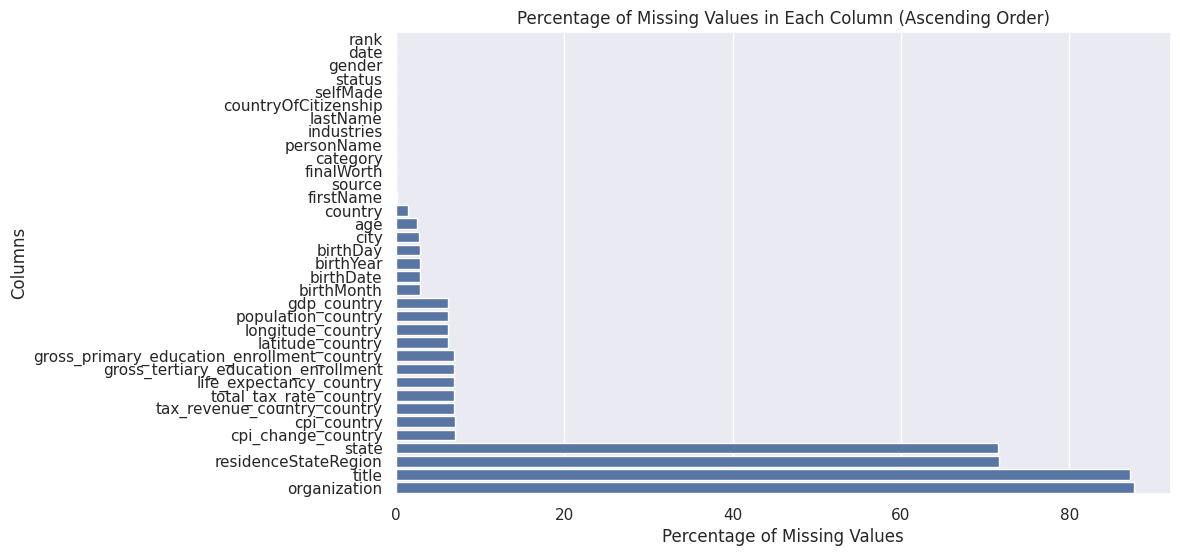

In [ ]:
# Calculate the percentage of missing values for each column
missing_values_percentage = df.isnull().mean() * 100

# Now you can sort and visualize the missing values
missing_values_percentage_sorted = missing_values_percentage.sort_values()

# Visualization code
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_percentage_sorted, y=missing_values_percentage_sorted.index)
plt.title('Percentage of Missing Values in Each Column (Ascending Order)')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.show()

<Axes: >

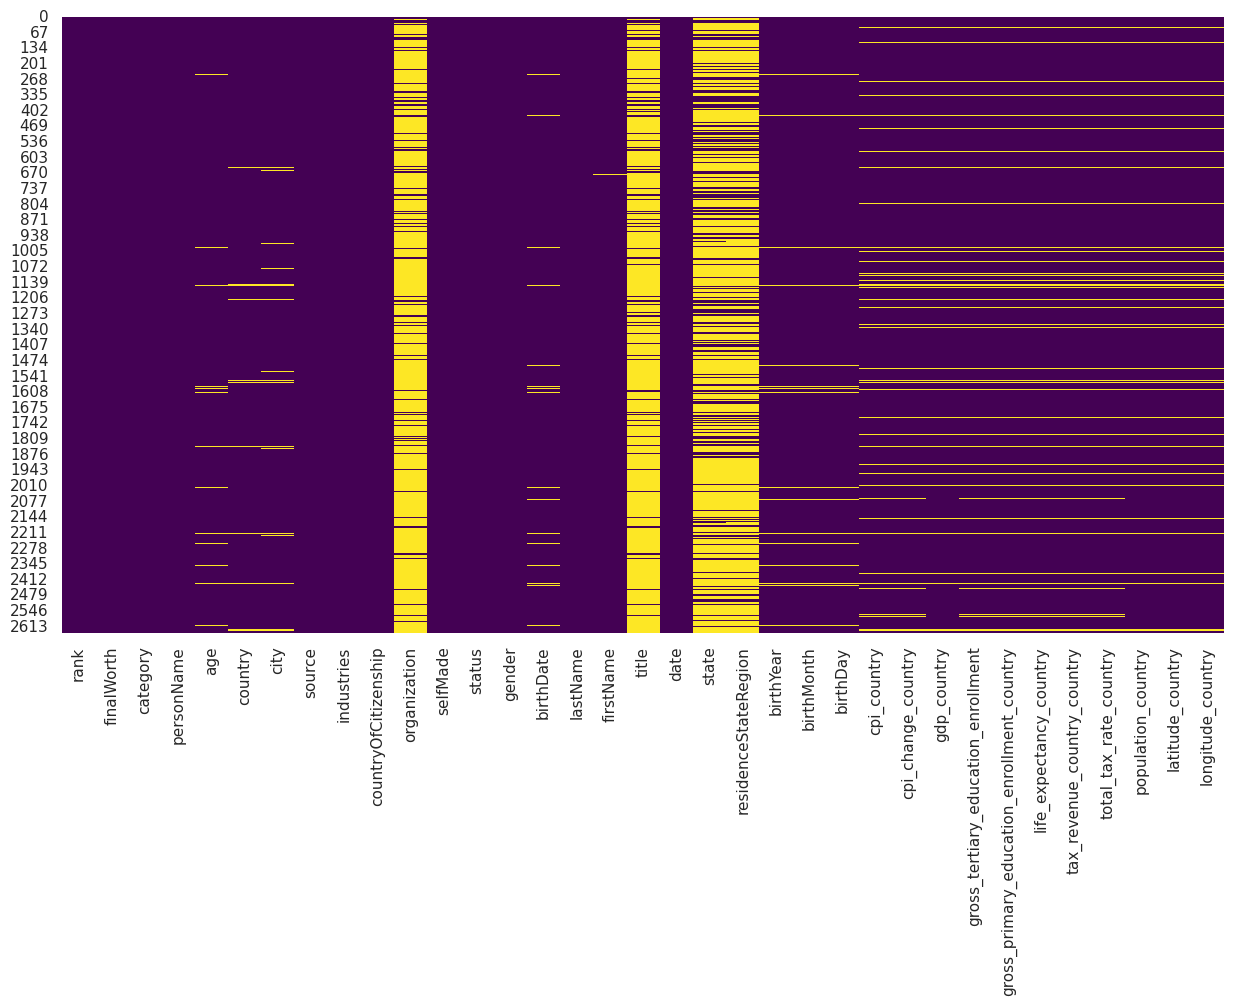

In [ ]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [ ]:
# Handling missing values
# Imputing missing values with the mean for continuous variables and mode for categorical variables
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

# Checking for missing values before imputation
missing_values = df.isnull().sum()

# Rechecking for missing values after imputation
missing_values_after = df.isnull().sum()

(missing_values, missing_values_after)

(rank                                          0
 finalWorth                                    0
 category                                      0
 personName                                    0
 age                                           0
 country                                       0
 city                                          0
 source                                        0
 industries                                    0
 countryOfCitizenship                          0
 organization                                  0
 selfMade                                      0
 status                                        0
 gender                                        0
 birthDate                                     0
 lastName                                      0
 firstName                                     0
 title                                         0
 date                                          0
 state                                         0
 residenceStateRegio

In [ ]:
missing_df =  df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len( df))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
rank,0,0.0
finalWorth,0,0.0
category,0,0.0
personName,0,0.0
age,0,0.0
country,0,0.0
city,0,0.0
source,0,0.0
industries,0,0.0
countryOfCitizenship,0,0.0


In [ ]:
df[df.duplicated(keep=False)]

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Drop duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(2640, 35)

In [ ]:
# Get the list of categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Create a DataFrame containing counts of unique values for each categorical column
cat_df = pd.DataFrame(df[cat_cols].melt(var_name='column', value_name='value')
                      .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])

# Display summary statistics of categorical variables
display(df[cat_cols].describe())

# Display counts of unique values for each categorical column
display(cat_df)

,category,personName,country,city,source,industries,countryOfCitizenship,organization,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,gdp_country
count,2640,2640,2640,2640,2640,2640,2640,2640,2640,2640,2640,2640,2640,2640,2640,2640,2640,2640
unique,18,2638,78,741,906,18,77,294,6,2,2060,1736,1770,97,2,45,5,68
top,Finance & Investments,Wang Yanqing & family,United States,New York,Real estate,Finance & Investments,United States,Meta Platforms,D,M,1/1/1965 0:00,Li,John,Investor,4/4/2023 5:01,California,West,"$21,427,700,000,000"
freq,372,2,792,171,151,372,735,2319,1223,2303,95,44,43,2345,2638,2065,2141,918


count
column    value                  
birthDate 1/1/1924 0:00         1
          8/17/1966 0:00        1
          8/14/1967 0:00        1
          8/15/1924 0:00        1
          8/15/1931 0:00        1
...                           ...
title     Chairman             25
          Chairman and CEO     28
          CEO                  29
          Founder              34
          Investor           2345

[10561 rows x 1 columns]

In [ ]:
df.describe(include='O').T

,count,unique,top,freq
category,2640,18,Finance & Investments,372
personName,2640,2638,Wang Yanqing & family,2
country,2640,78,United States,792
city,2640,741,New York,171
source,2640,906,Real estate,151
industries,2640,18,Finance & Investments,372
countryOfCitizenship,2640,77,United States,735
organization,2640,294,Meta Platforms,2319
status,2640,6,D,1223
gender,2640,2,M,2303


In [ ]:
# Inspect useless features
df.nunique().sort_values()

date                                             2
selfMade                                         2
gender                                           2
residenceStateRegion                             5
status                                           6
birthMonth                                      13
category                                        18
industries                                      18
birthDay                                        32
state                                           45
cpi_change_country                              45
life_expectancy_country                         55
tax_revenue_country_country                     58
gross_primary_education_enrollment_country      61
cpi_country                                     64
total_tax_rate_country                          64
gross_tertiary_education_enrollment             64
gdp_country                                     68
latitude_country                                69
population_country             

Univariate Analysis

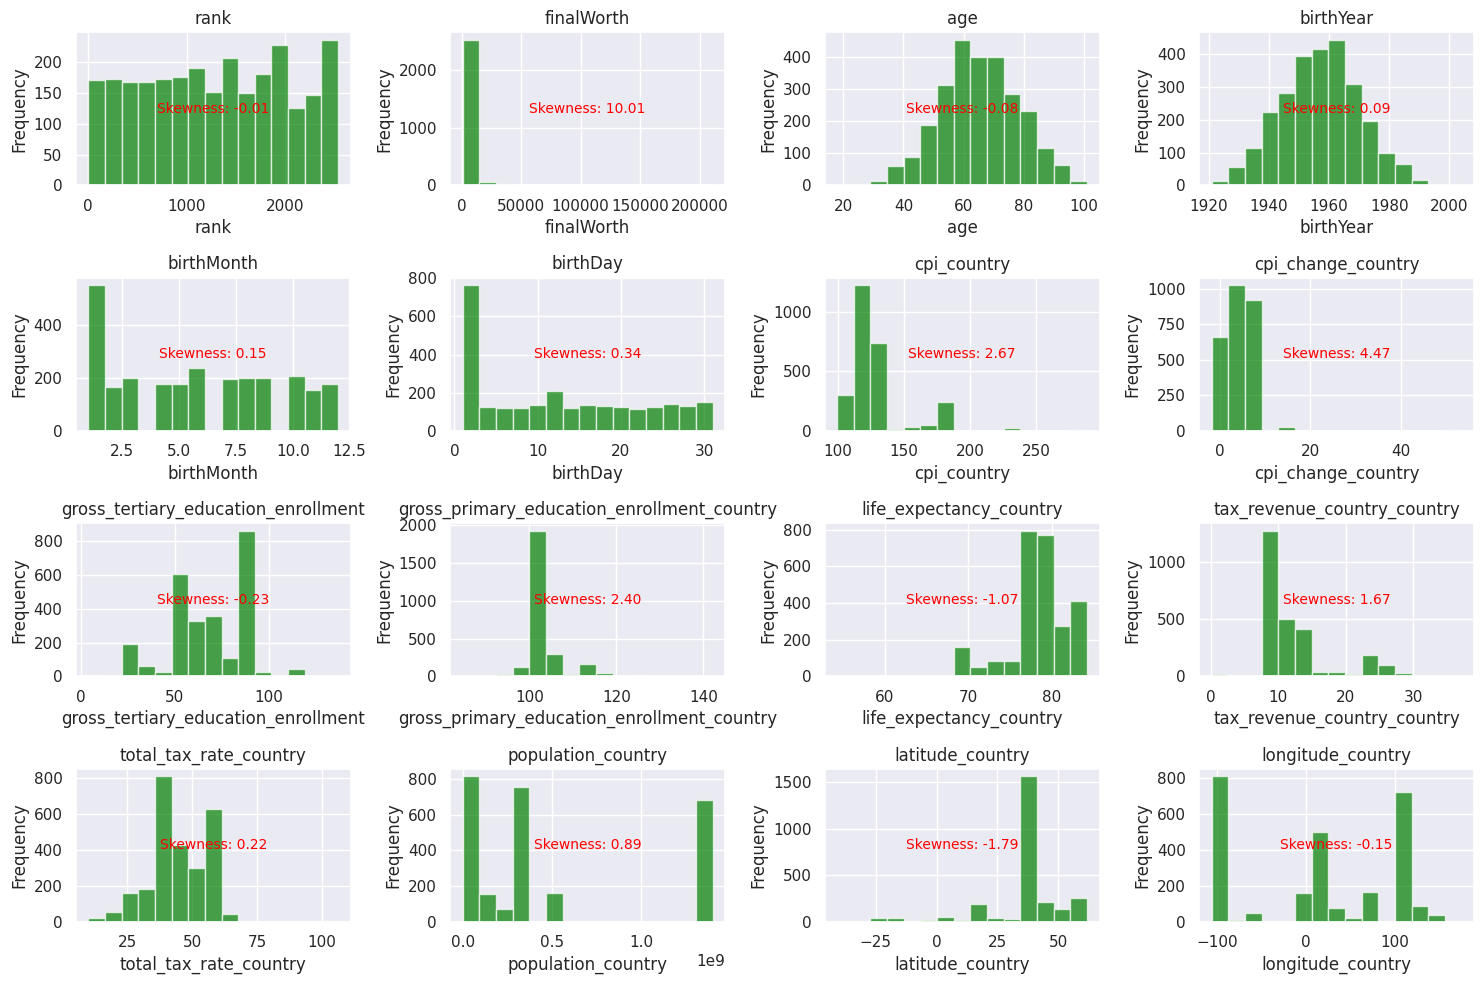

Skewness:
rank                                          -0.006357
finalWorth                                    10.012367
age                                           -0.079037
birthYear                                      0.088424
birthMonth                                     0.152703
birthDay                                       0.343254
cpi_country                                    2.670268
cpi_change_country                             4.465587
gross_tertiary_education_enrollment           -0.234110
gross_primary_education_enrollment_country     2.401476
life_expectancy_country                       -1.074991
tax_revenue_country_country                    1.673160
total_tax_rate_country                         0.218546
population_country                             0.893157
latitude_country                              -1.788847
longitude_country                             -0.150828
dtype: float64


In [ ]:
# Calculate skewness for numerical columns
skewness = df.select_dtypes(include=['int64', 'float64']).skew()

# Count the number of numerical columns
num_cols_count = len(df.select_dtypes(include=['int64', 'float64']).columns)

# Determine the layout for subplots
num_rows = (num_cols_count + 3) // 4  # Adjust the number of columns in each row
num_cols = min(4, num_cols_count)  # Maximum of 4 columns in each row

# Plot histograms for numerical columns to visualize distributions and identify anomalies
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i in range(num_rows):
    for j in range(num_cols):
        col_idx = i * num_cols + j
        if col_idx < num_cols_count:
            col = df.select_dtypes(include=['int64', 'float64']).columns[col_idx]
            axes[i, j].hist(df[col], bins=15, color='green', alpha=0.7)
            axes[i, j].set_title(f'{col}')
            axes[i, j].set_xlabel(col)
            axes[i, j].set_ylabel('Frequency')

            # Compute skewness
            skew_val = skewness[col]

            # Plot skewness value in the center of plot
            axes[i, j].text(0.5, 0.5, f'Skewness: {skew_val:.2f}', horizontalalignment='center',
                            verticalalignment='center', transform=axes[i, j].transAxes, fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Print skewness values
print("Skewness:")
print(skewness)

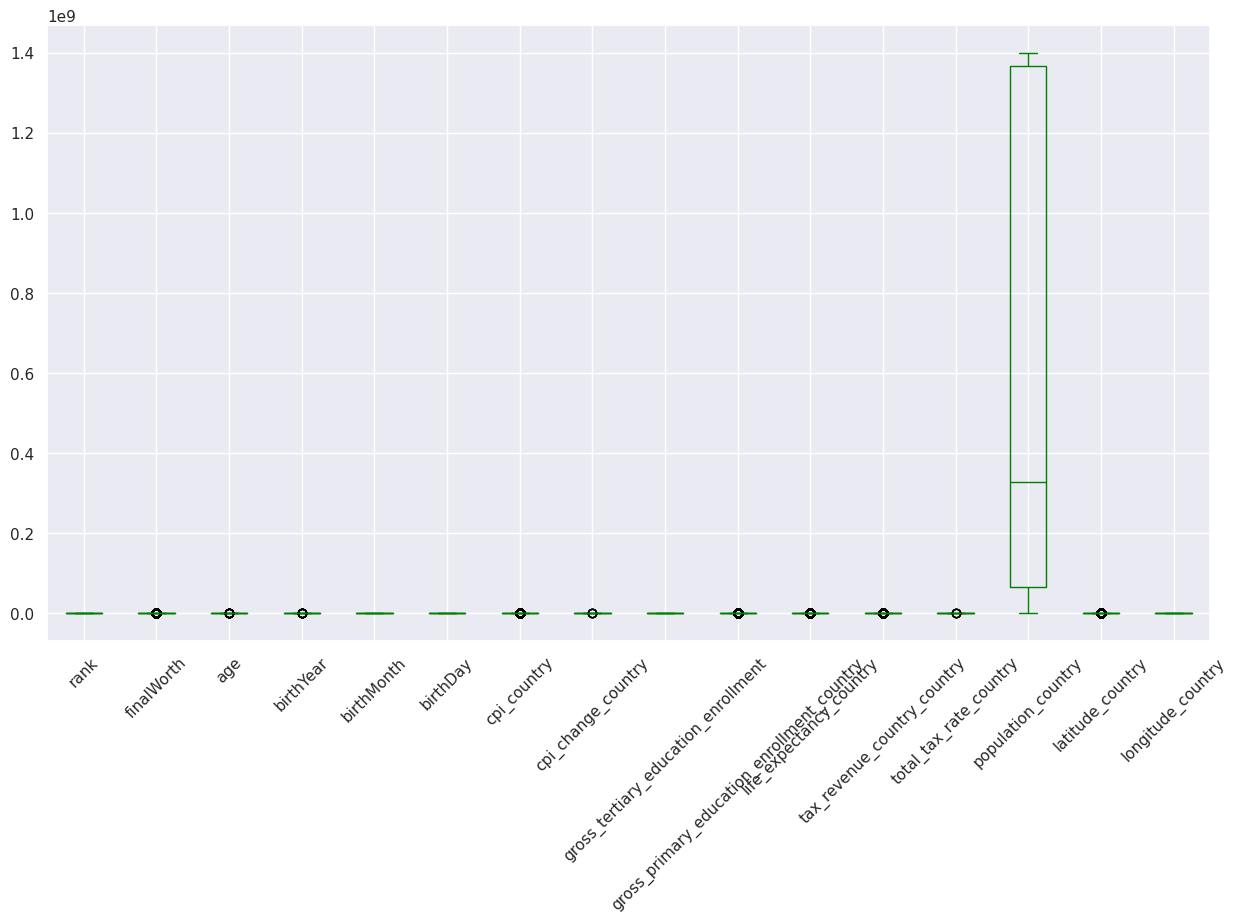

In [ ]:
# Plot the boxplot with rotated text labels
df.plot(kind='box', rot=45,color='green')

# Show the plot
plt.show()

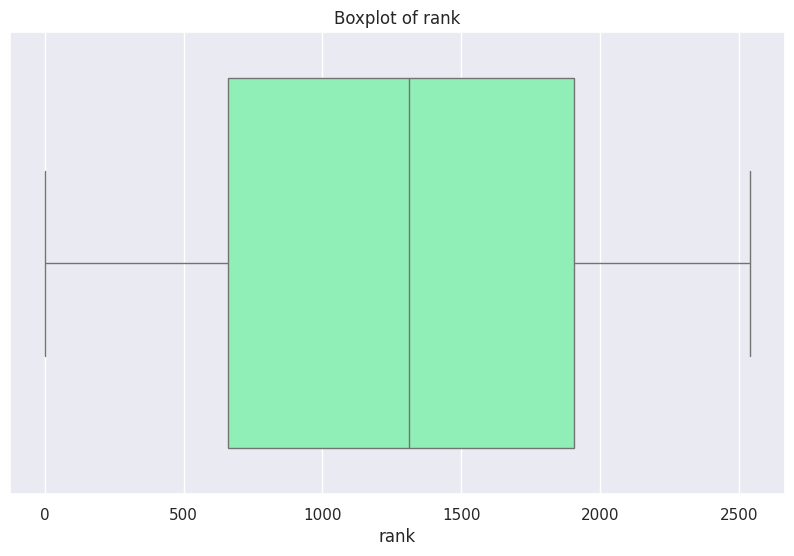

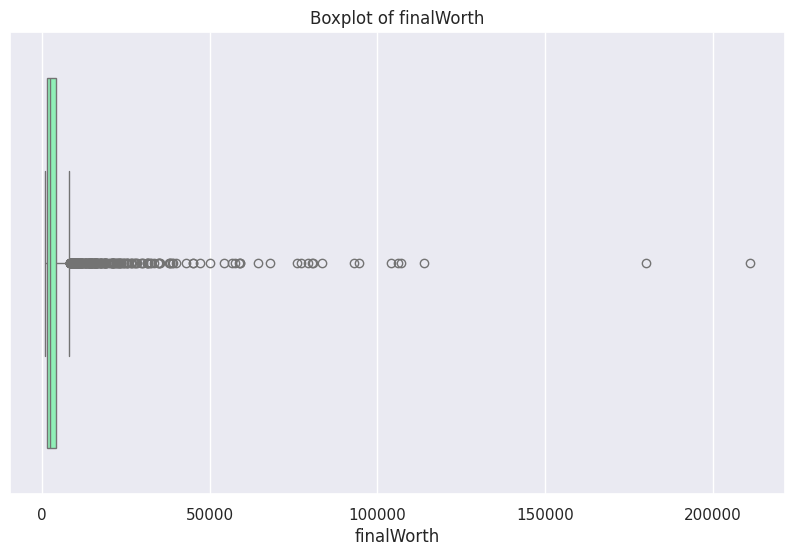

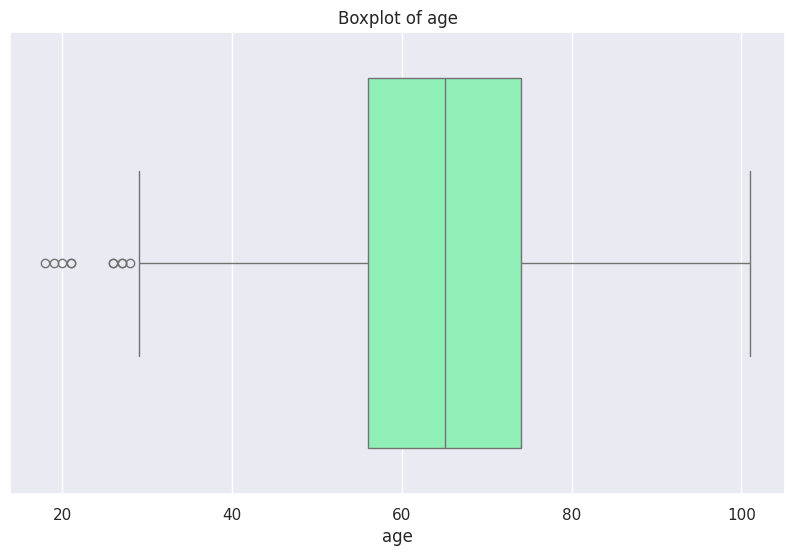

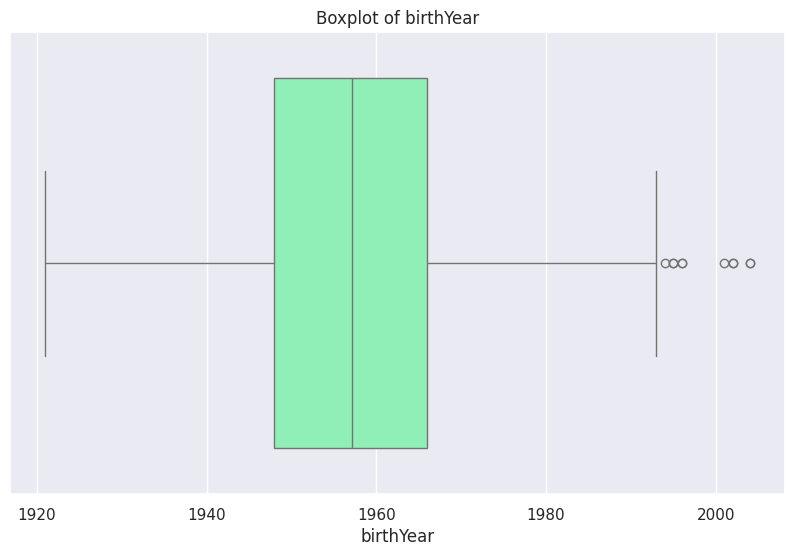

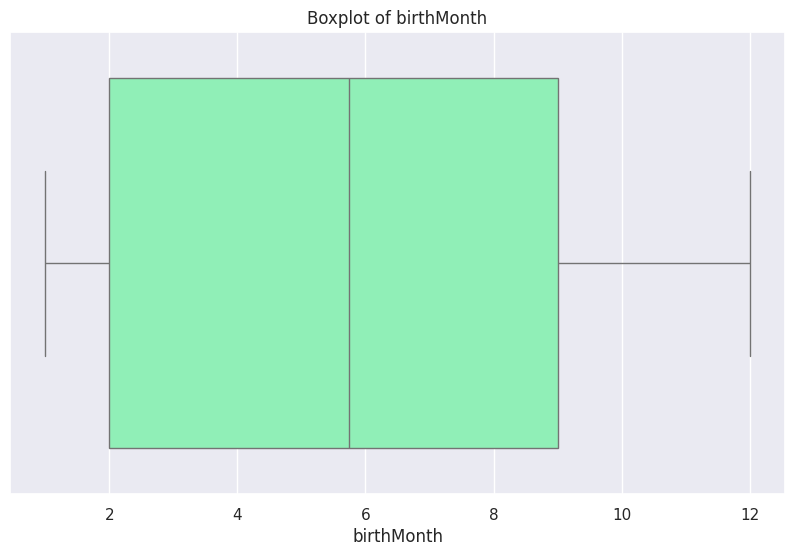

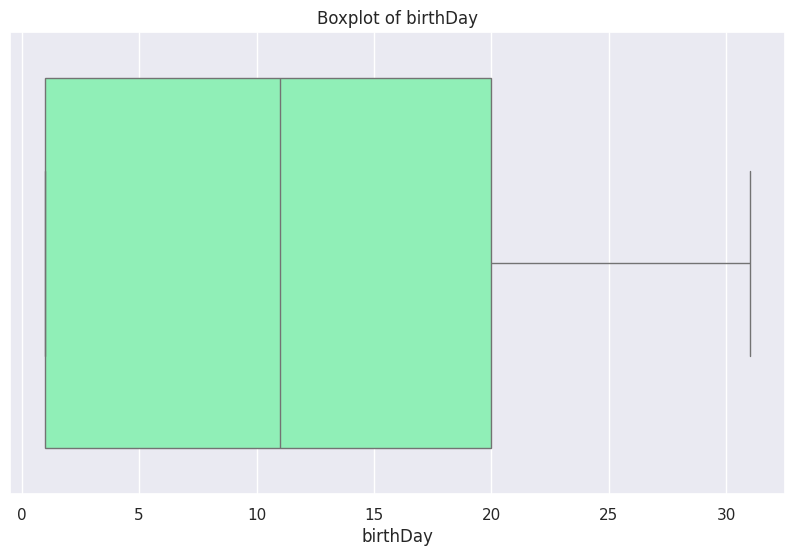

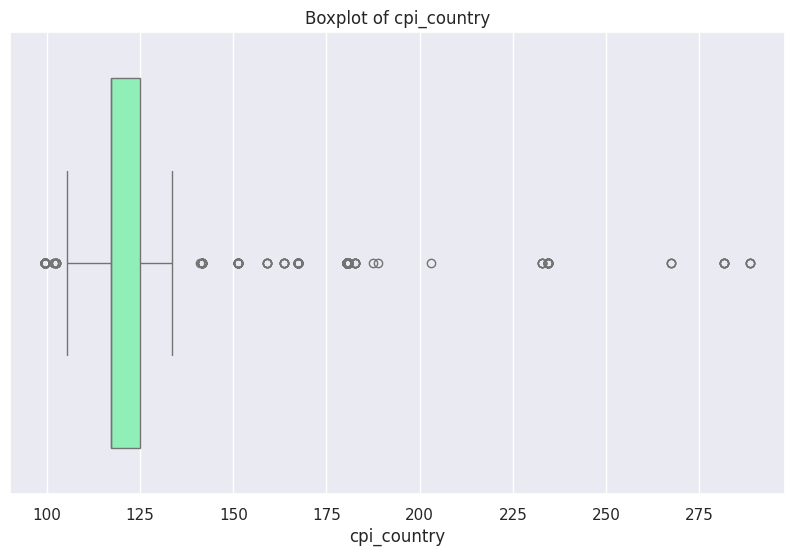

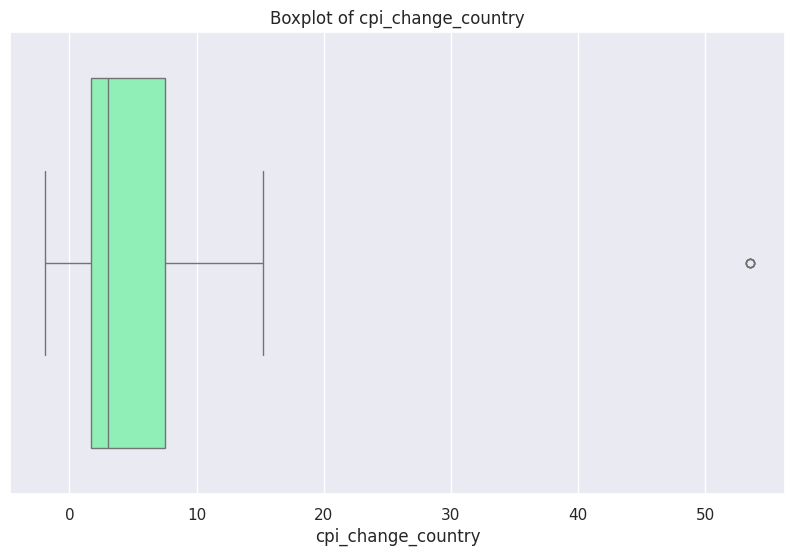

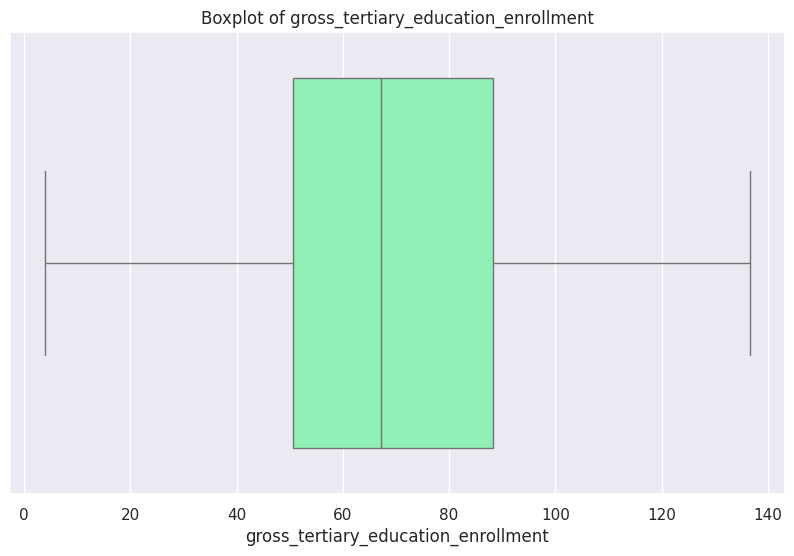

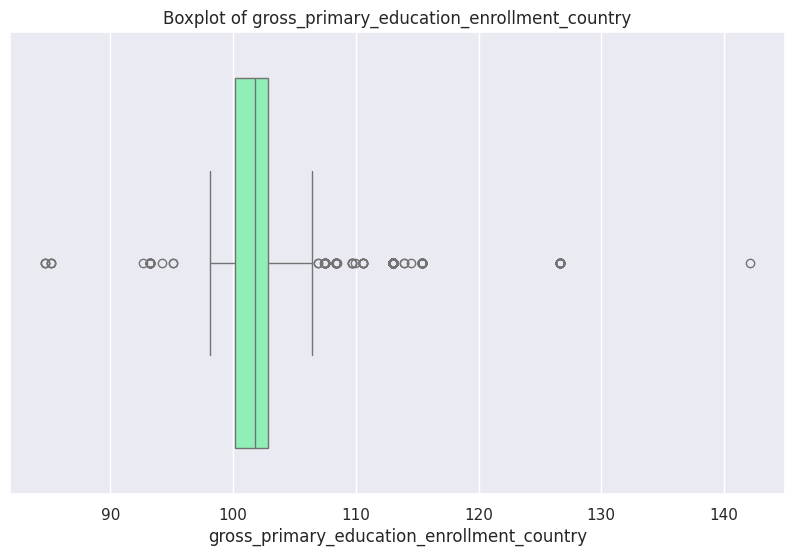

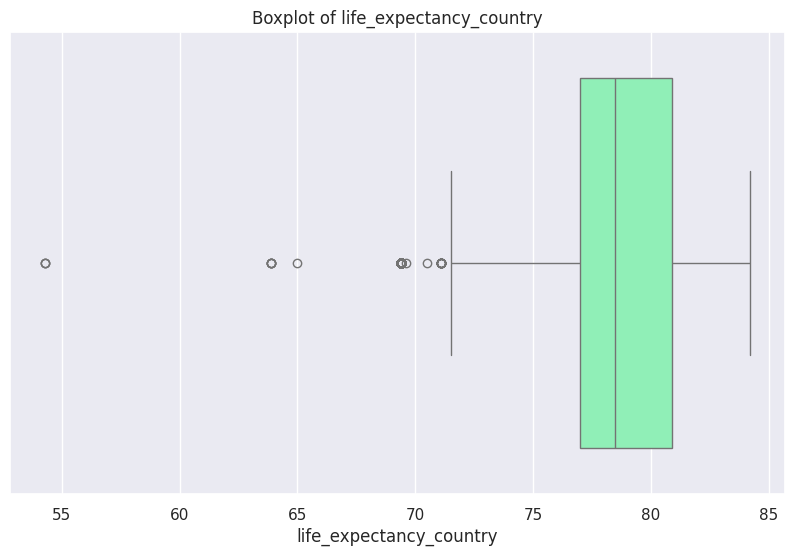

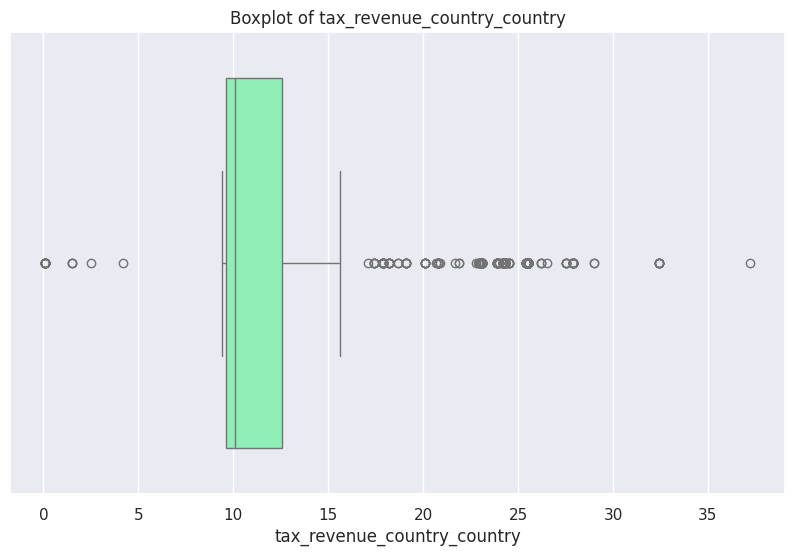

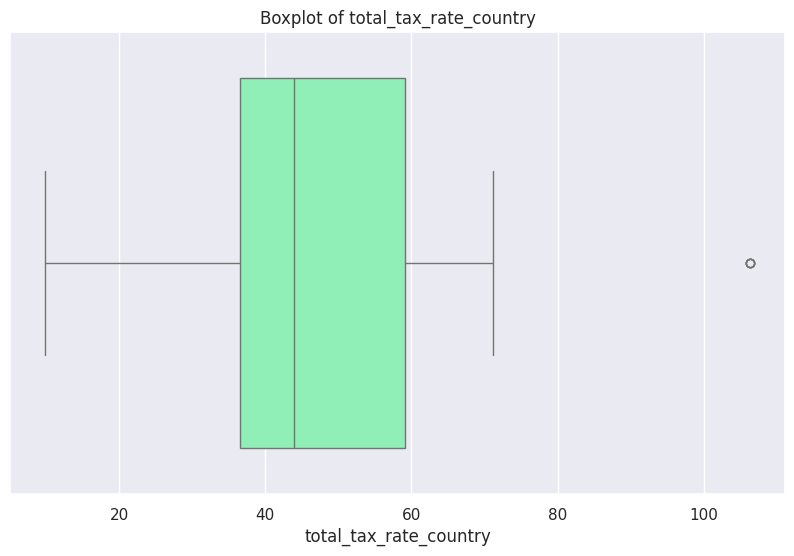

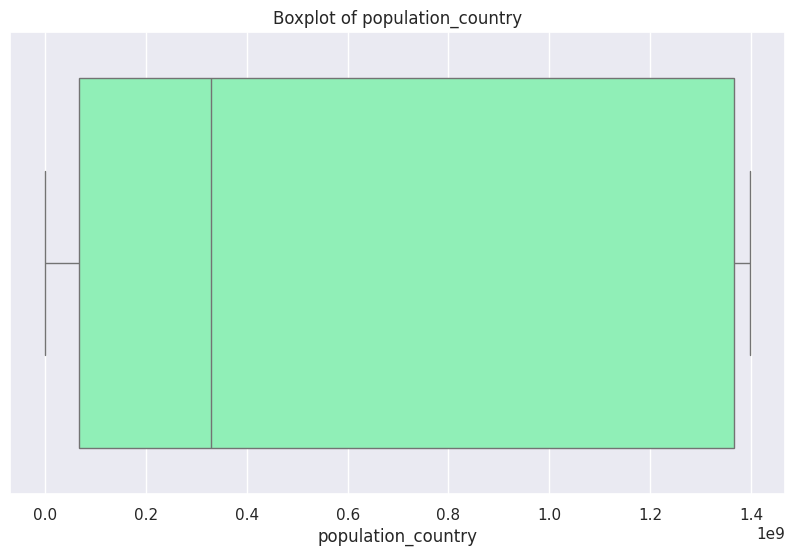

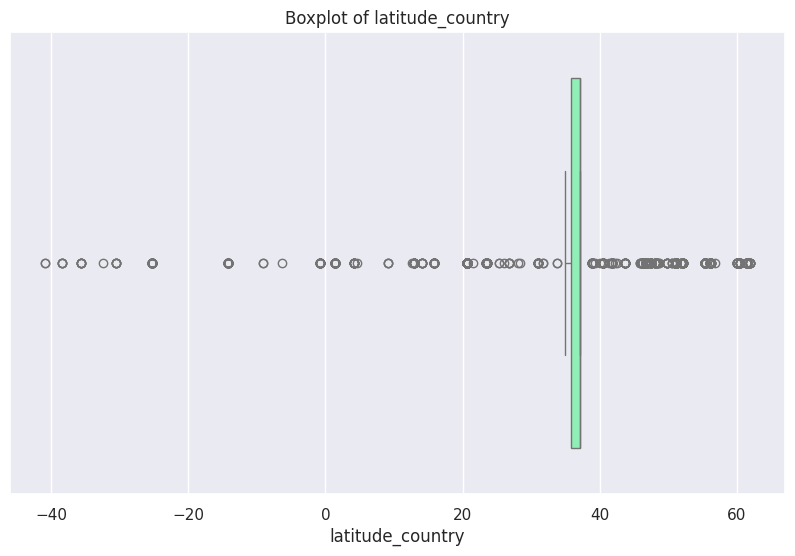

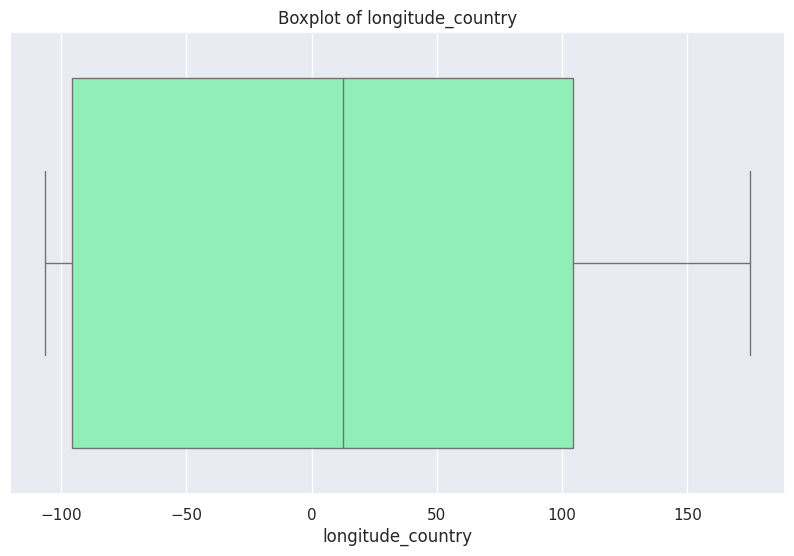

In [ ]:
# Filter numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting boxplots for each numerical feature to identify outliers
for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column],palette='rainbow')
    plt.title(f'Boxplot of {column}')
    plt.show()

Multivariate Analysis

Text(0.5, 1.0, 'Correlation Matrix')

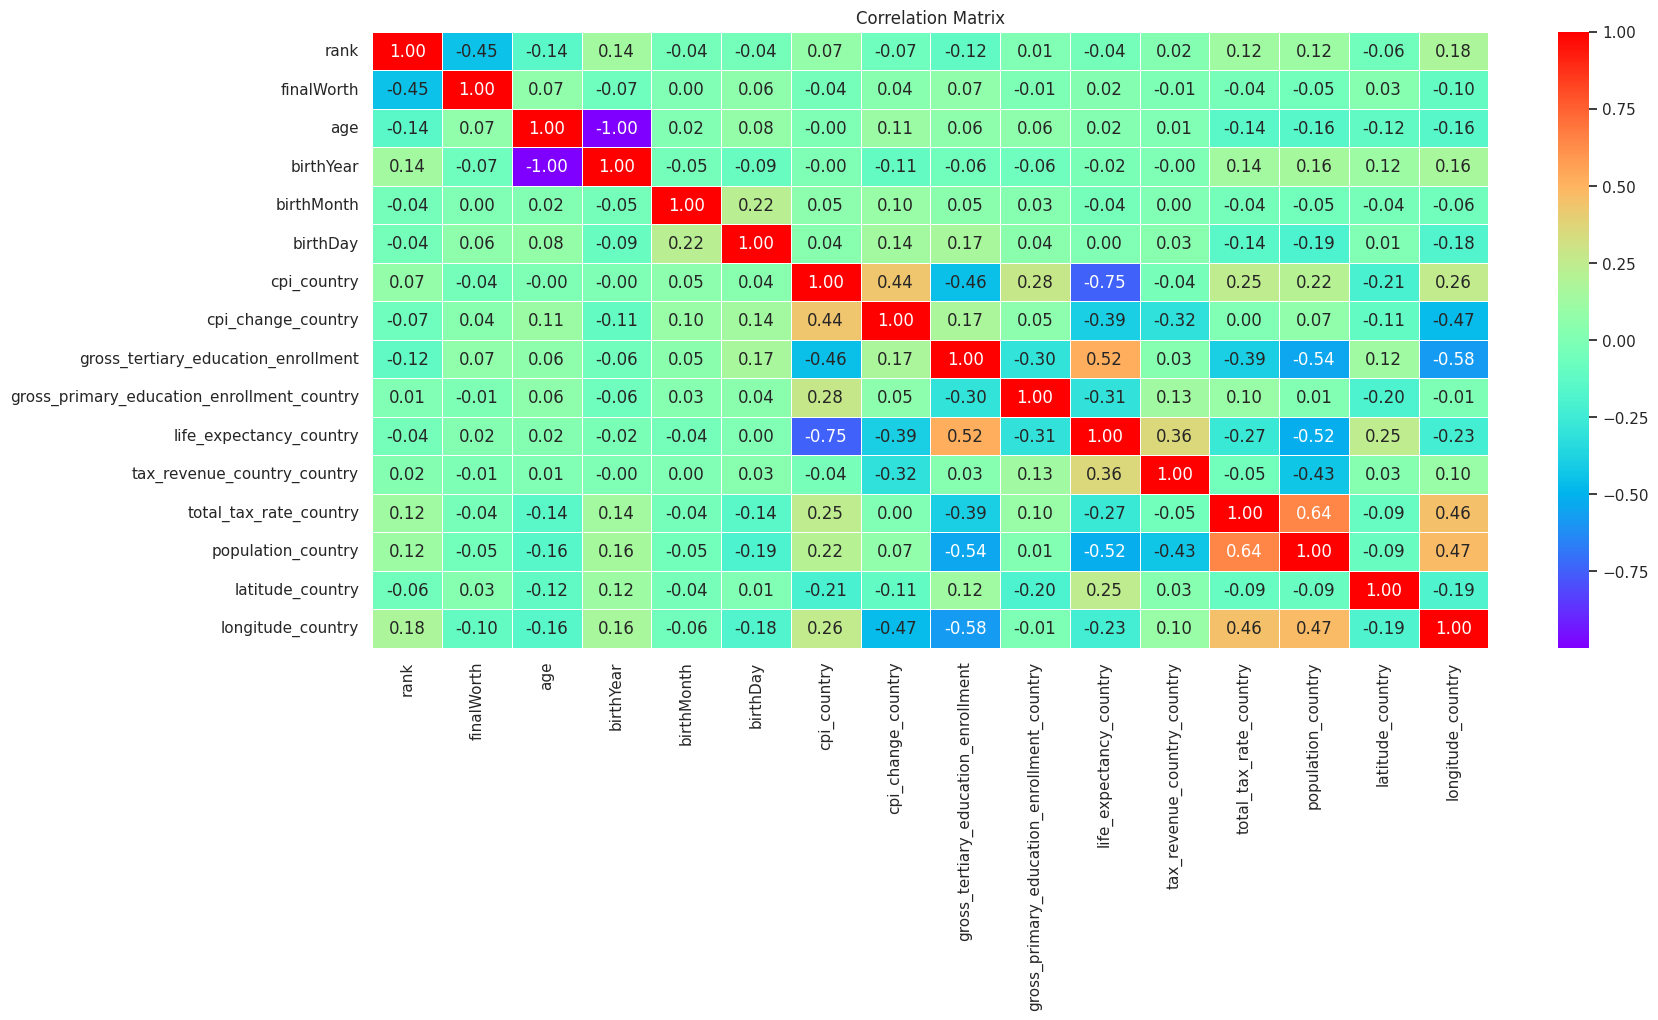

In [ ]:
# Correlation matrix

# Select only the numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

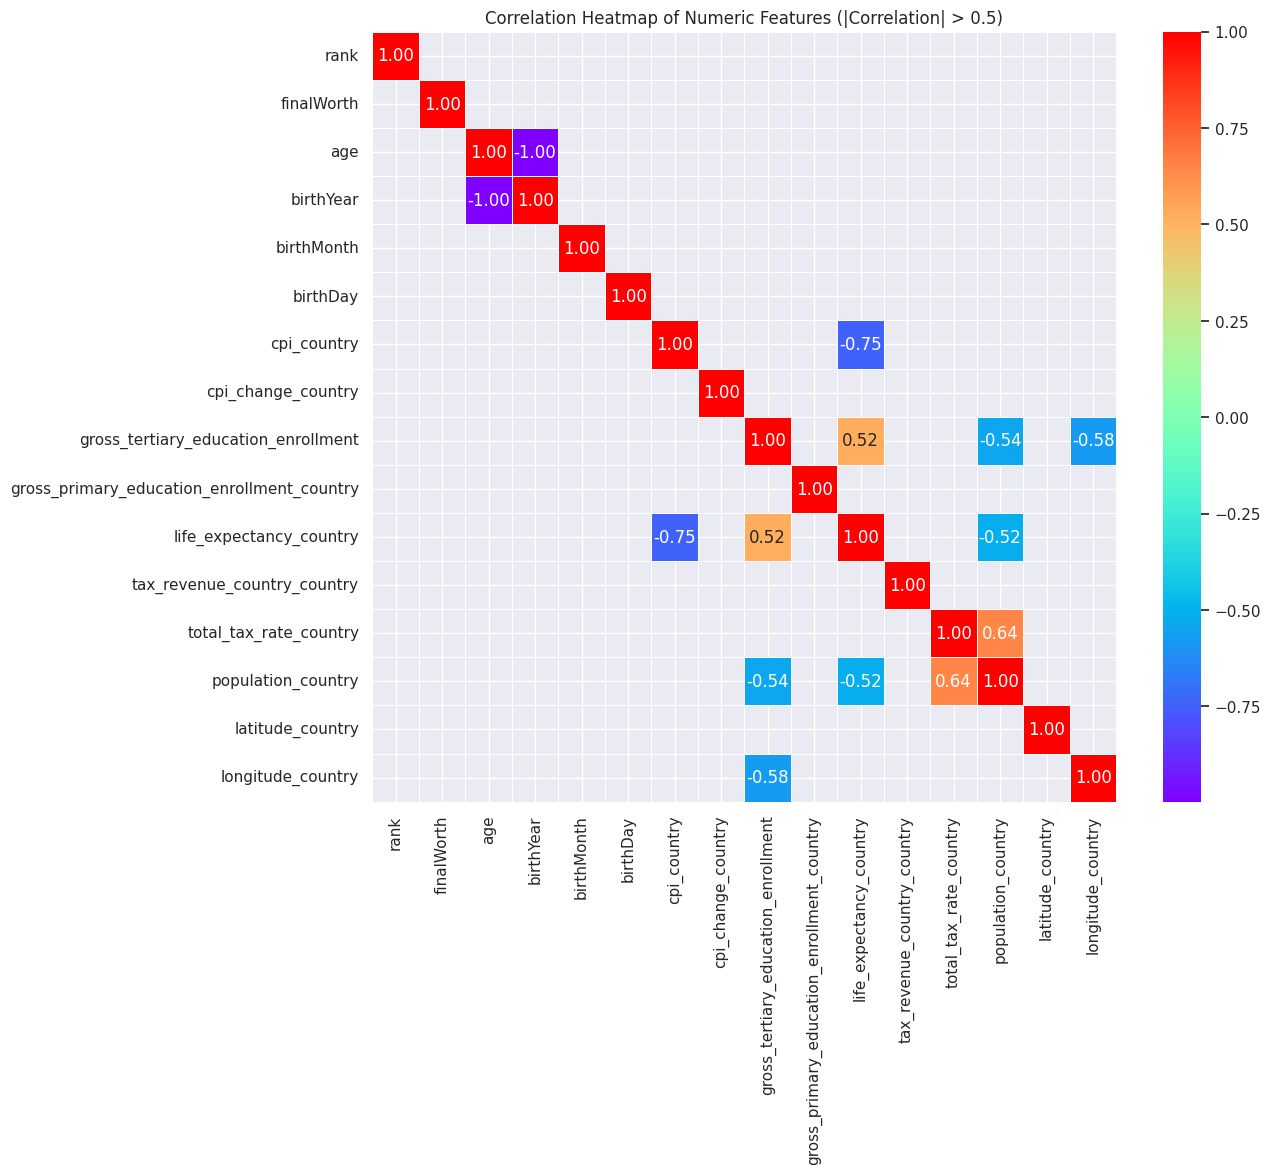

In [ ]:
# Heatmap Plotting
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Filter correlation matrix to include values greater than 0.5 or less than -0.5
corr_matrix_filtered = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

# Plot the heatmap with filtered correlation values
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features (|Correlation| > 0.5)')
plt.show()

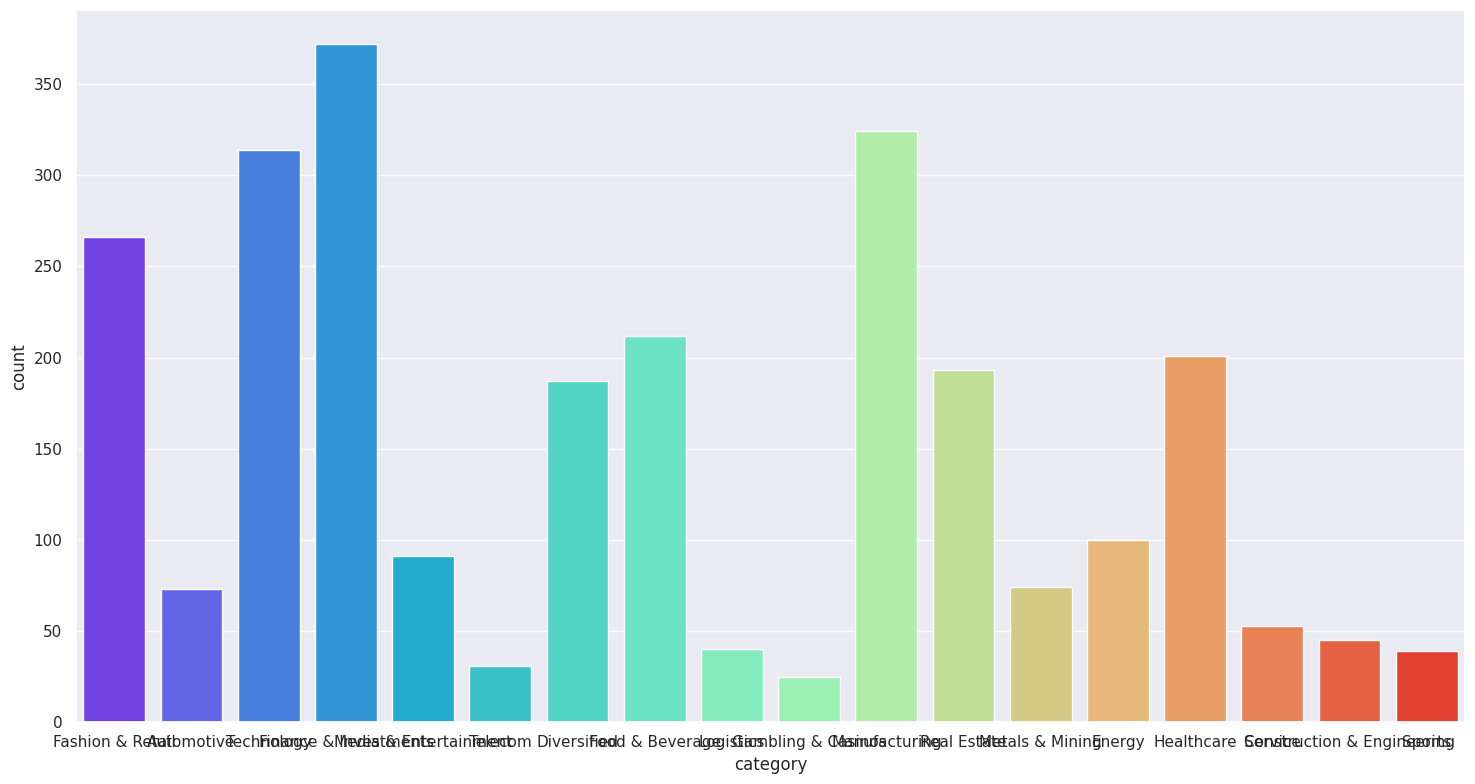

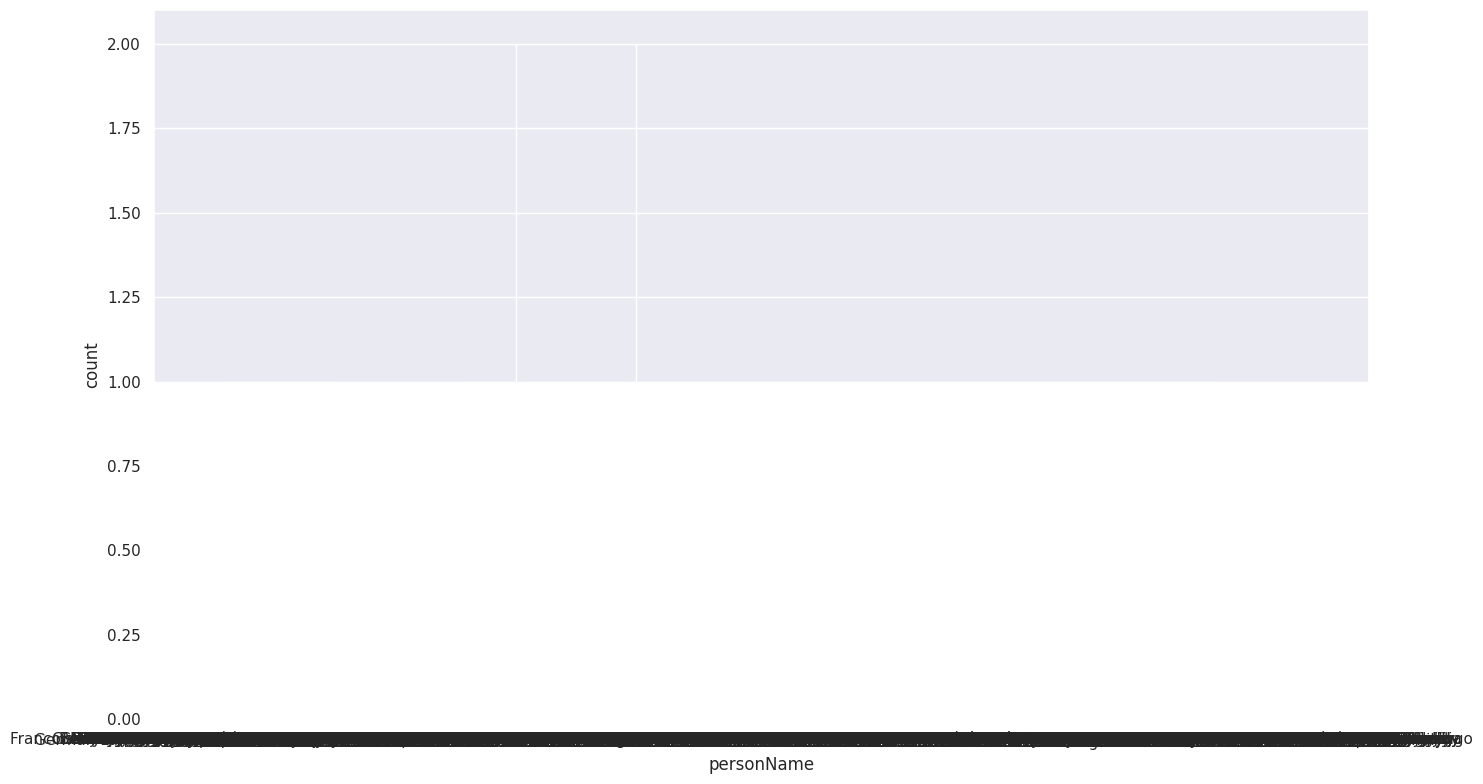

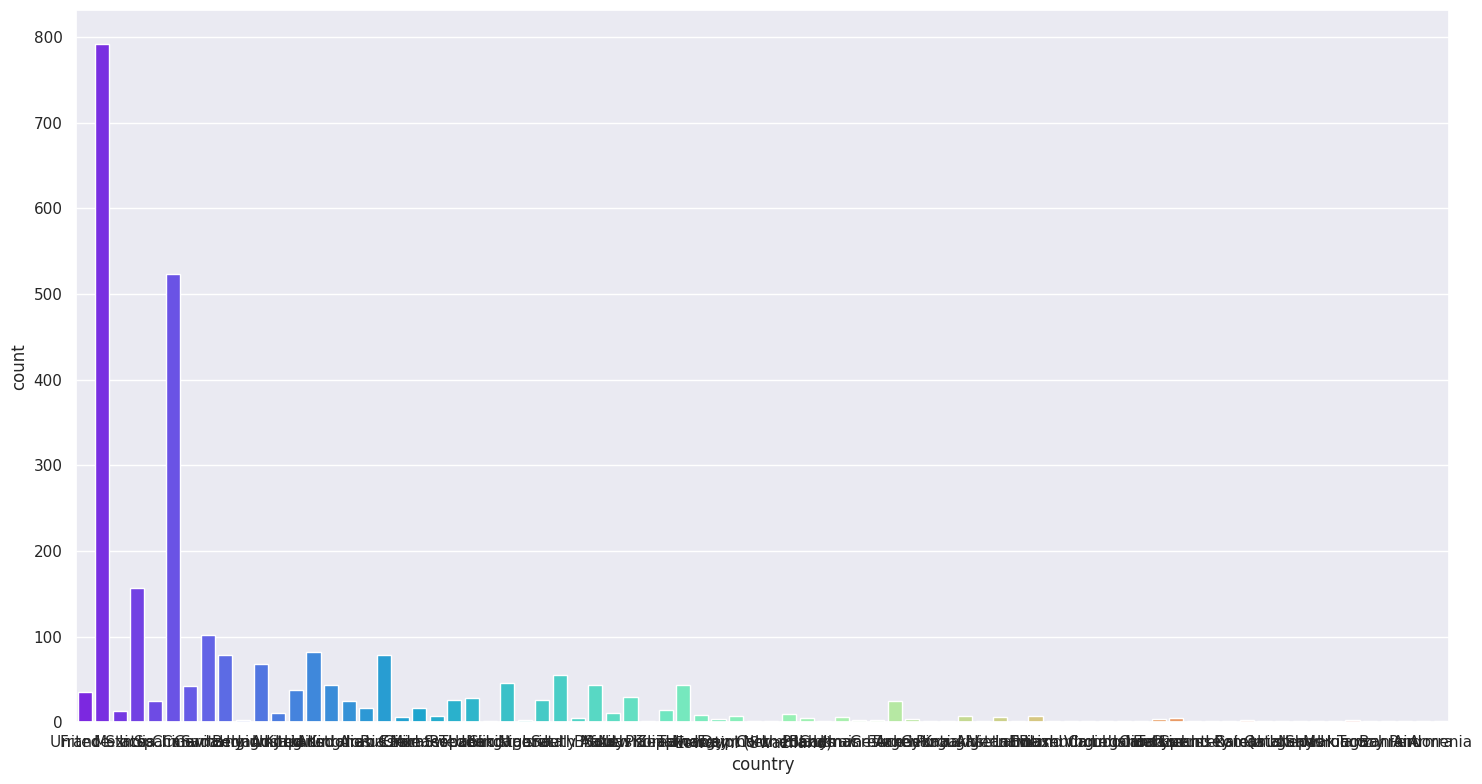

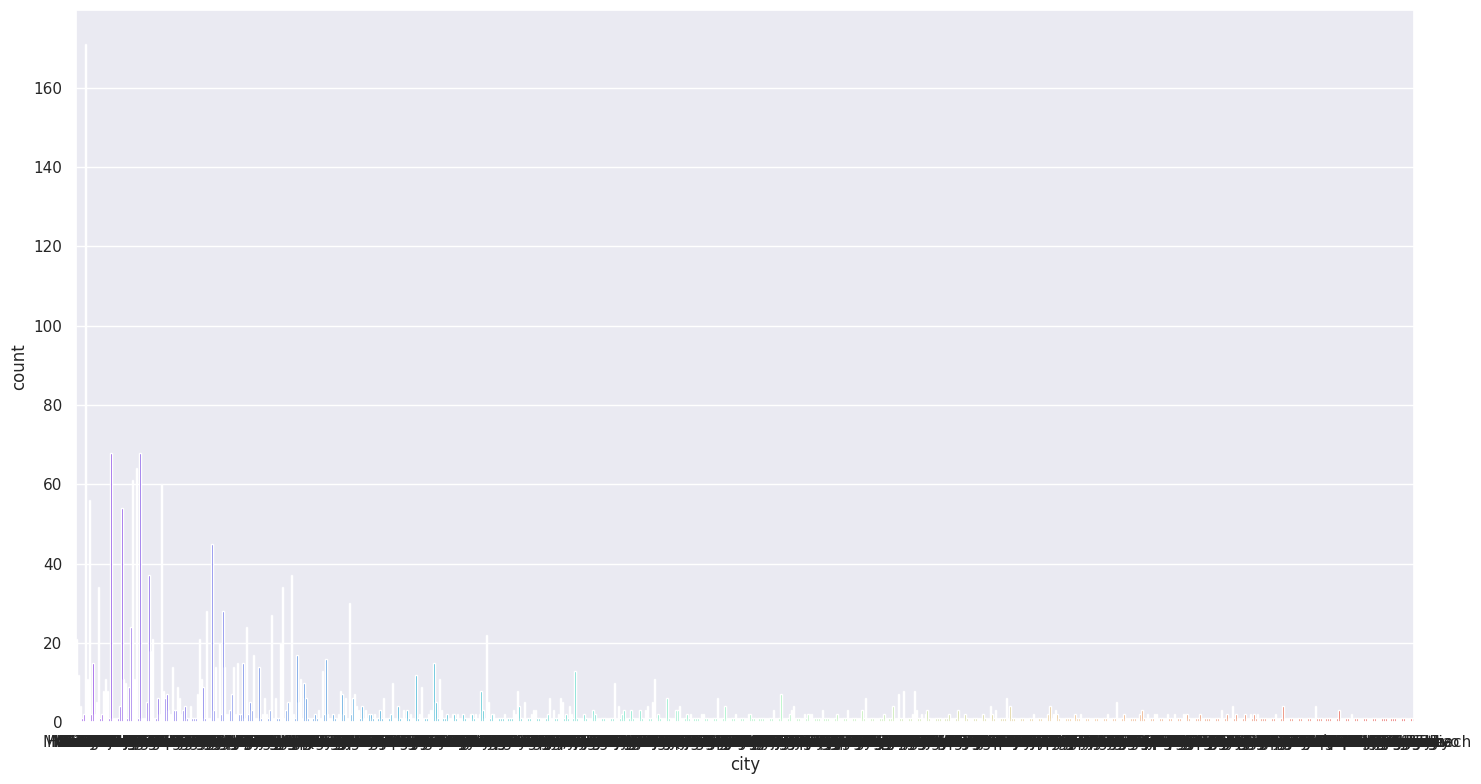

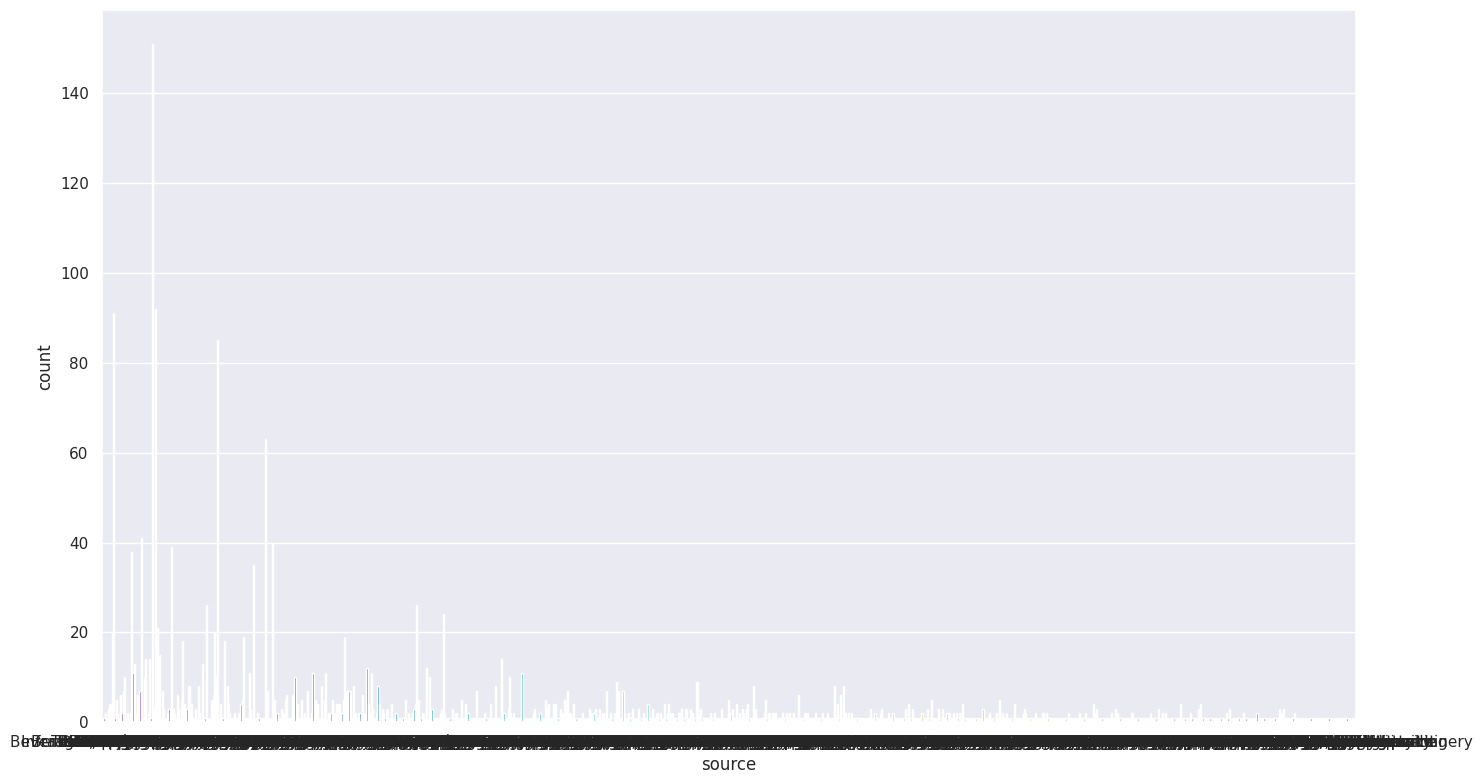

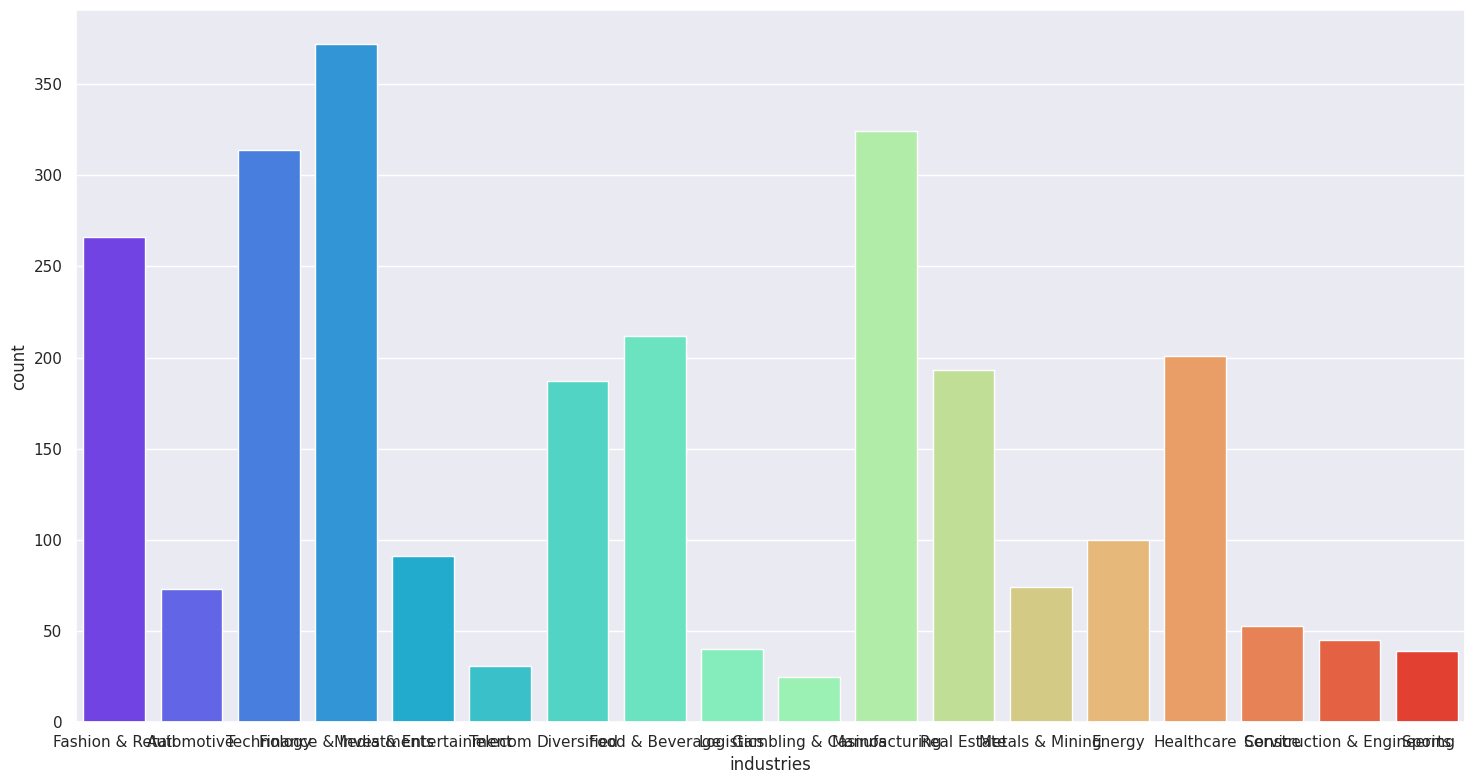

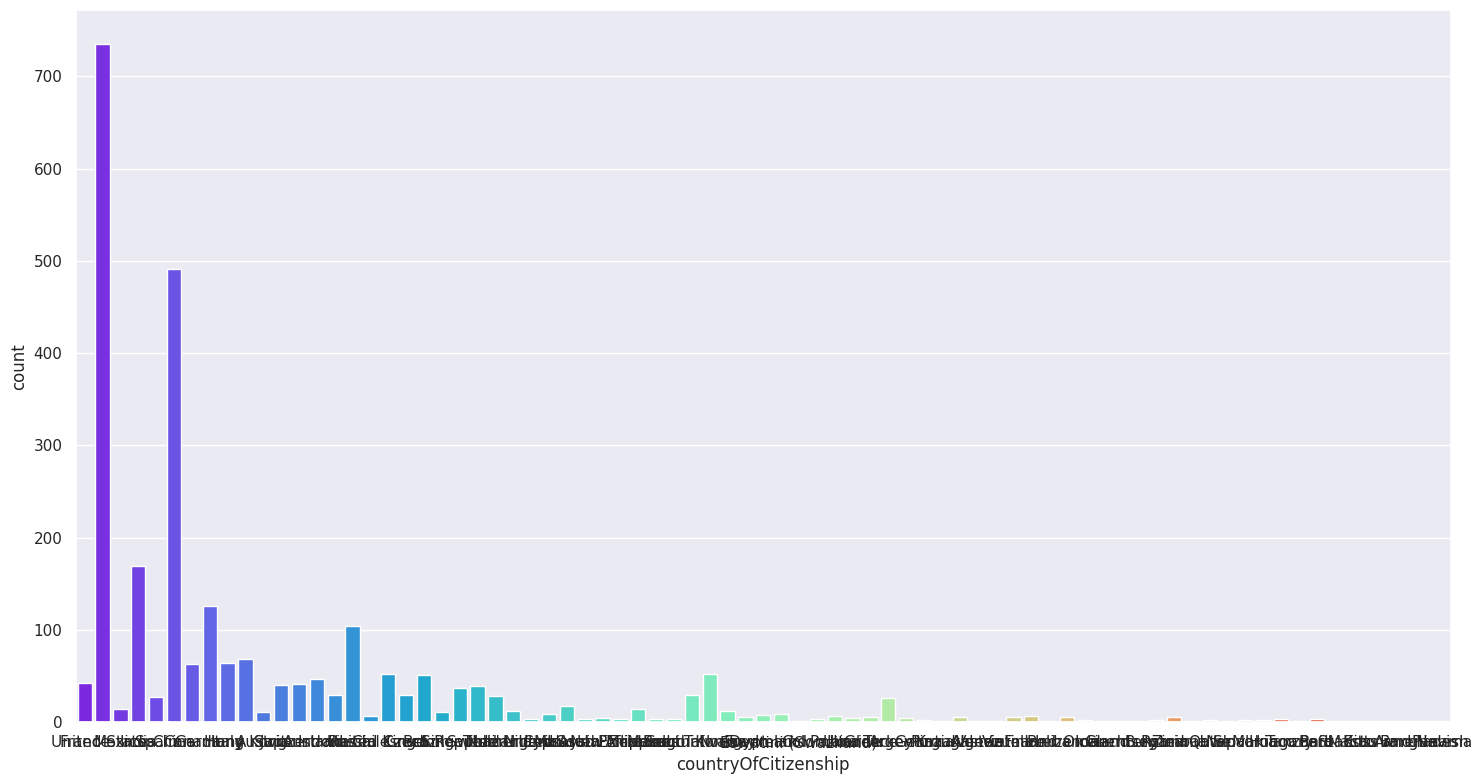

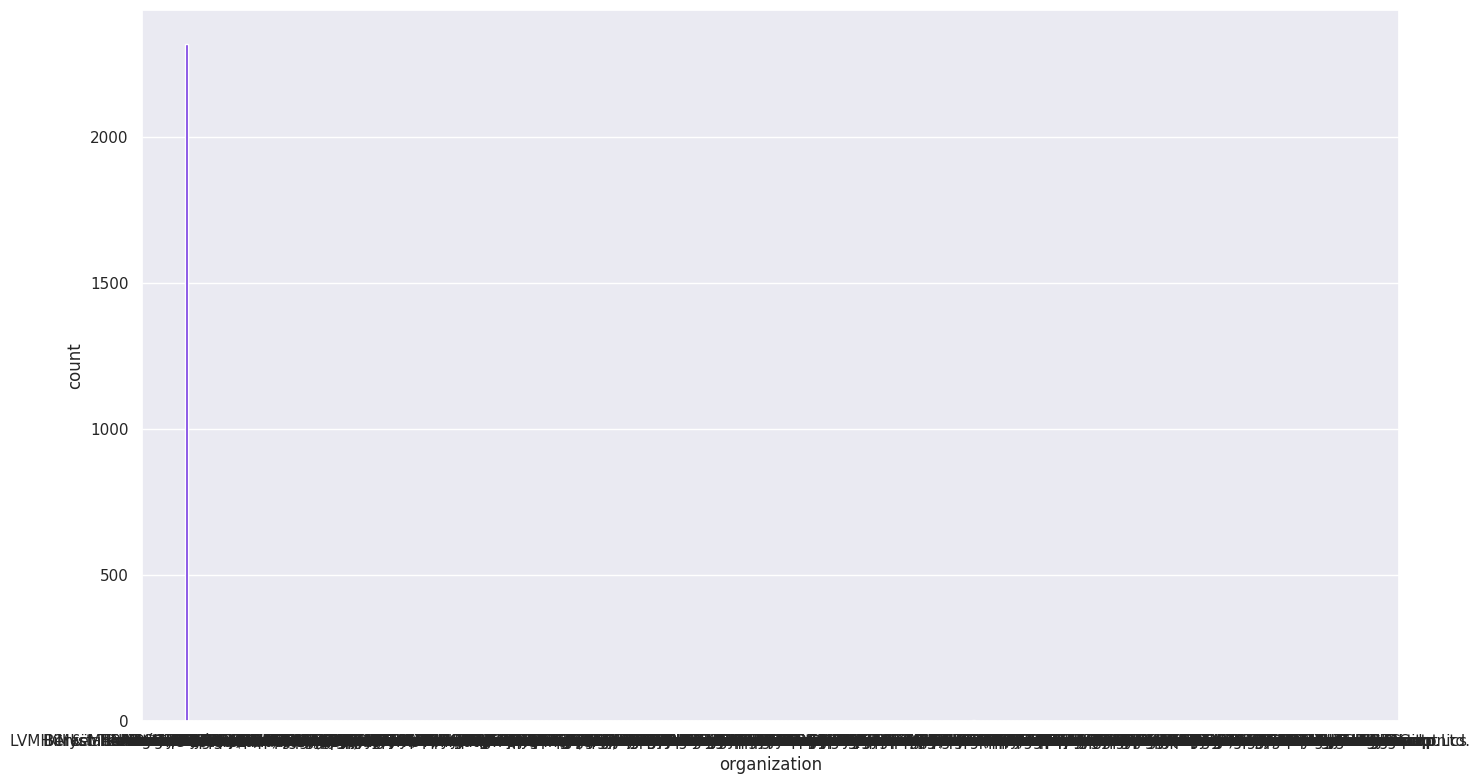

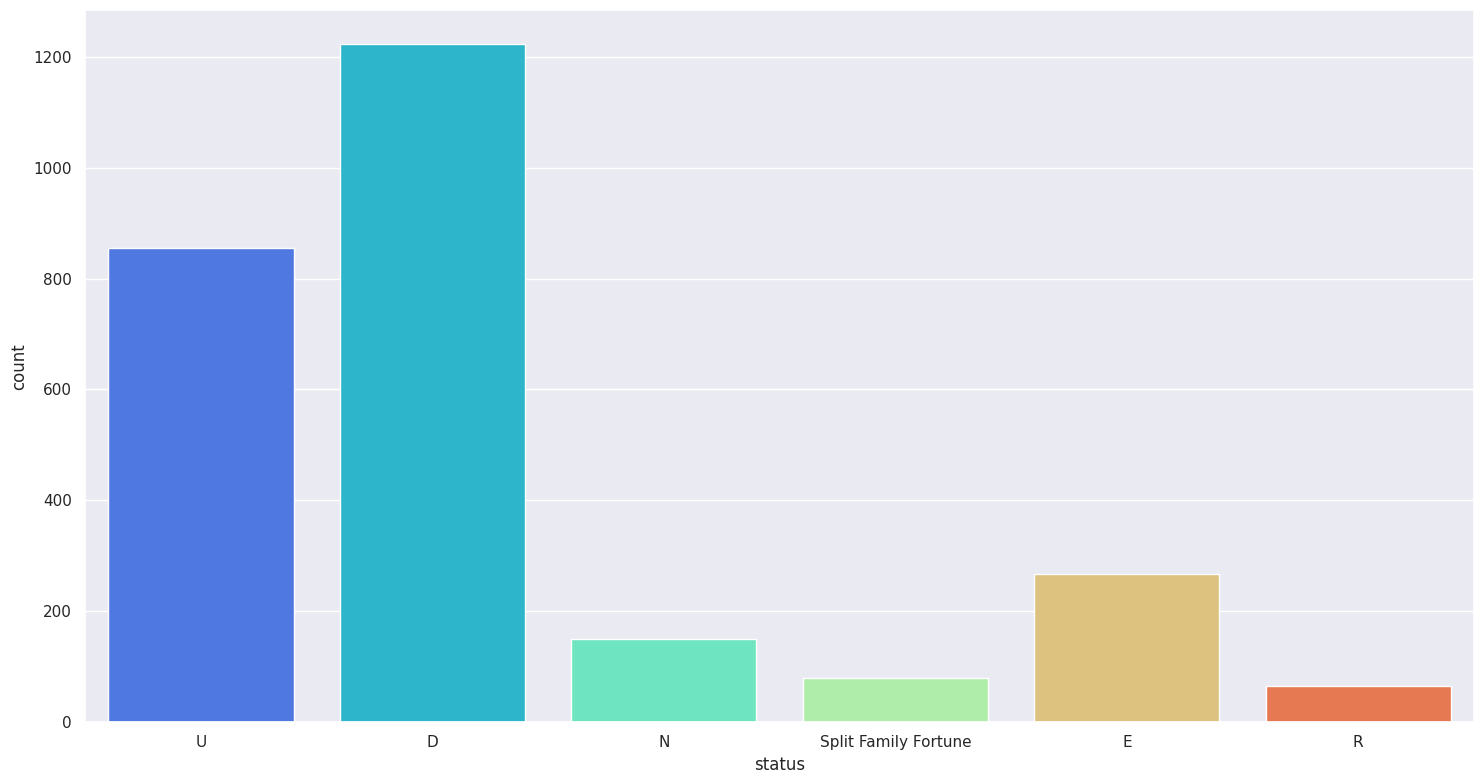

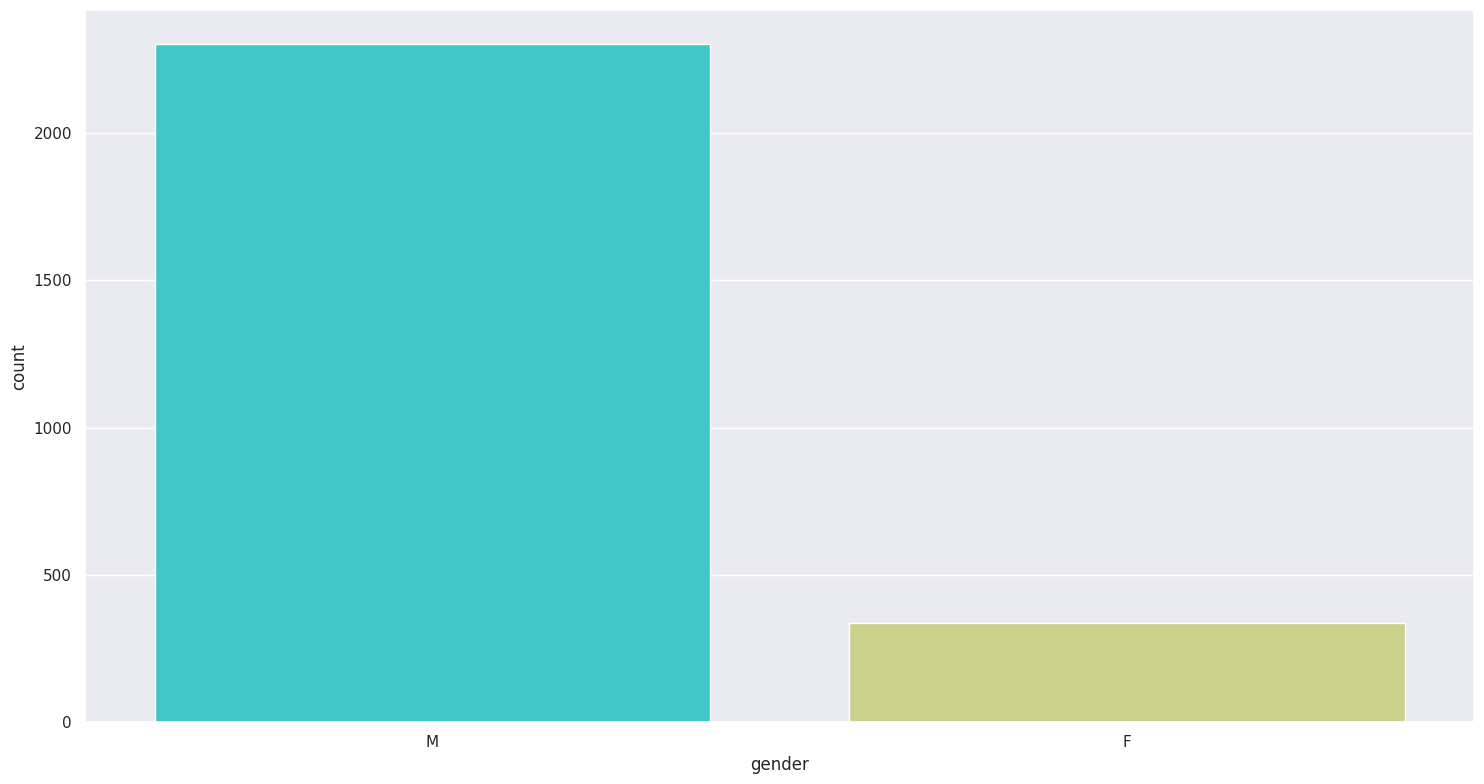

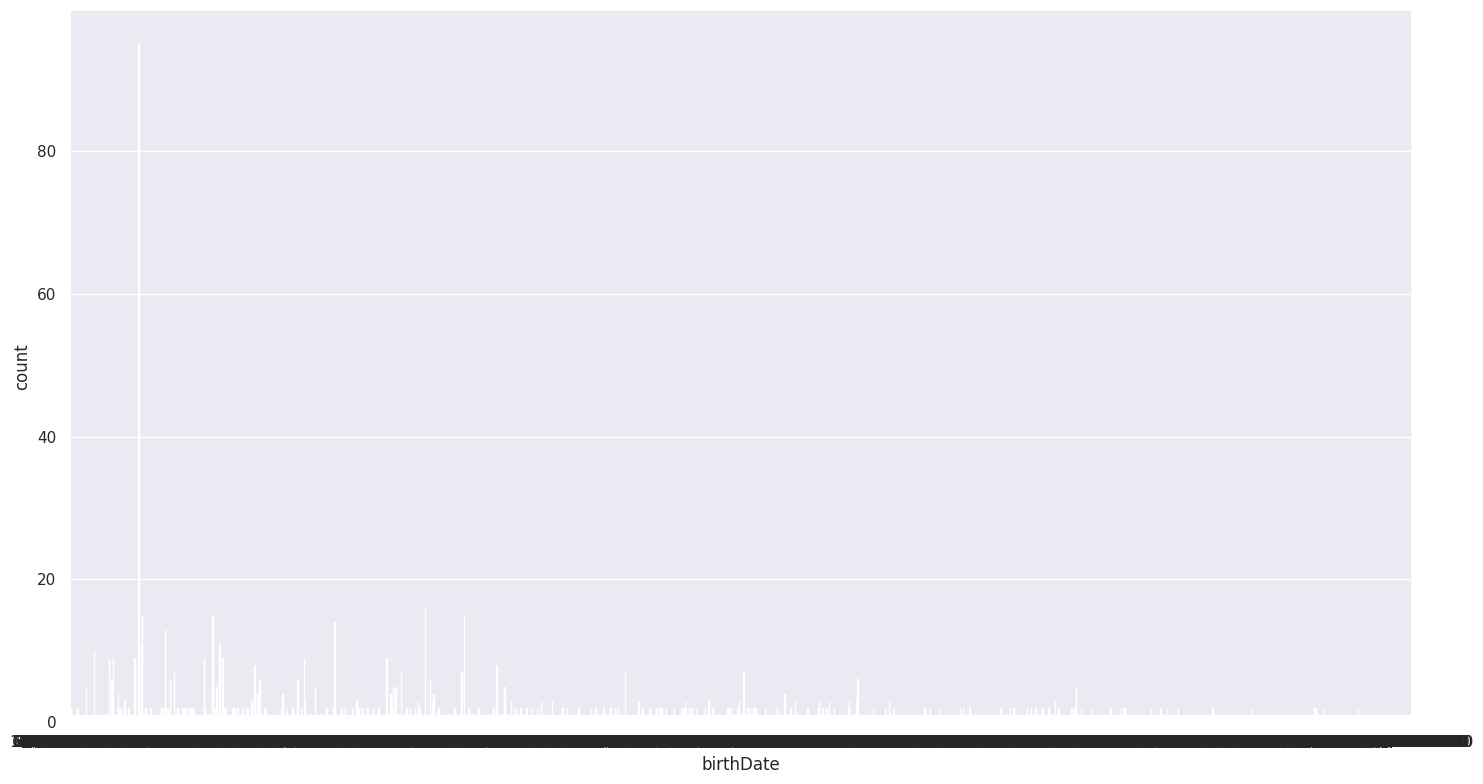

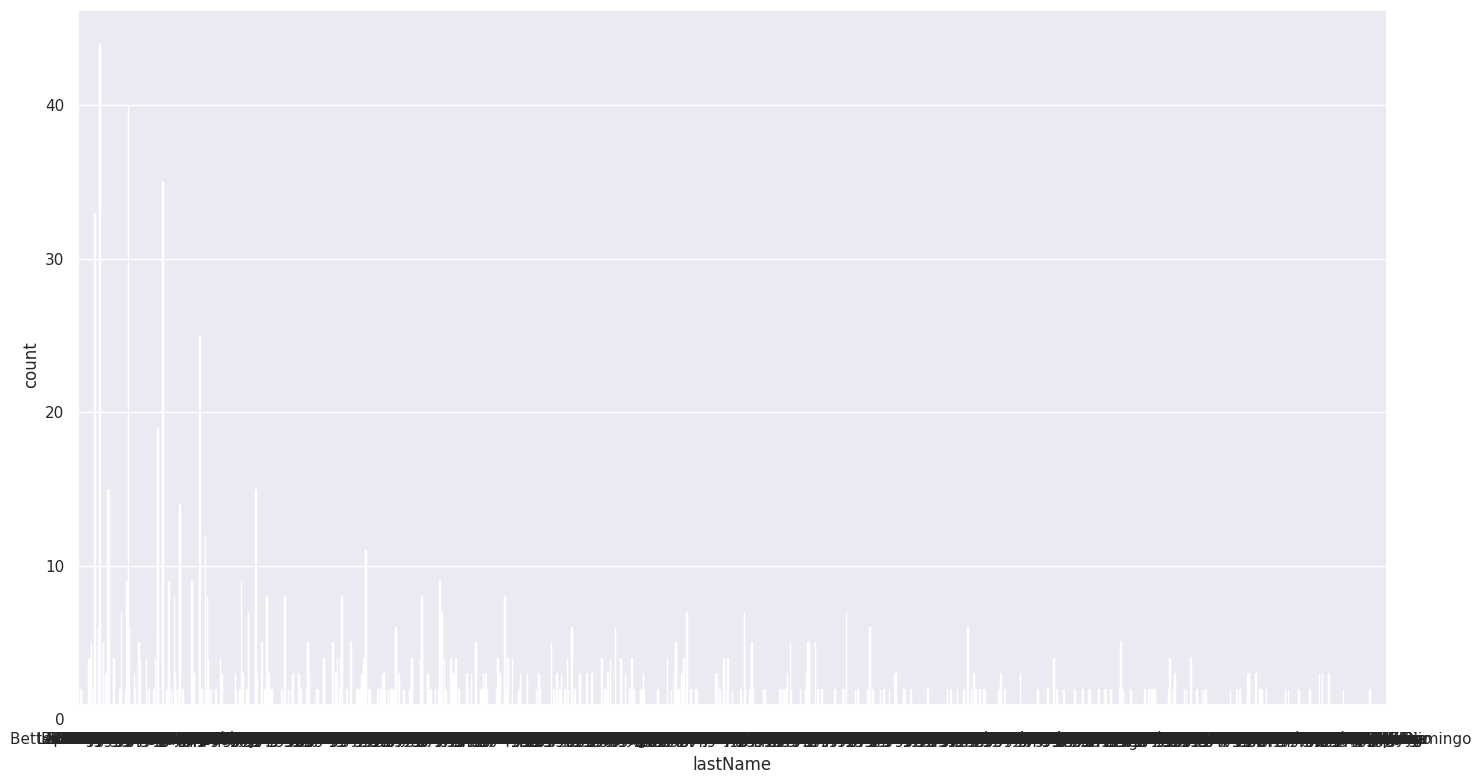

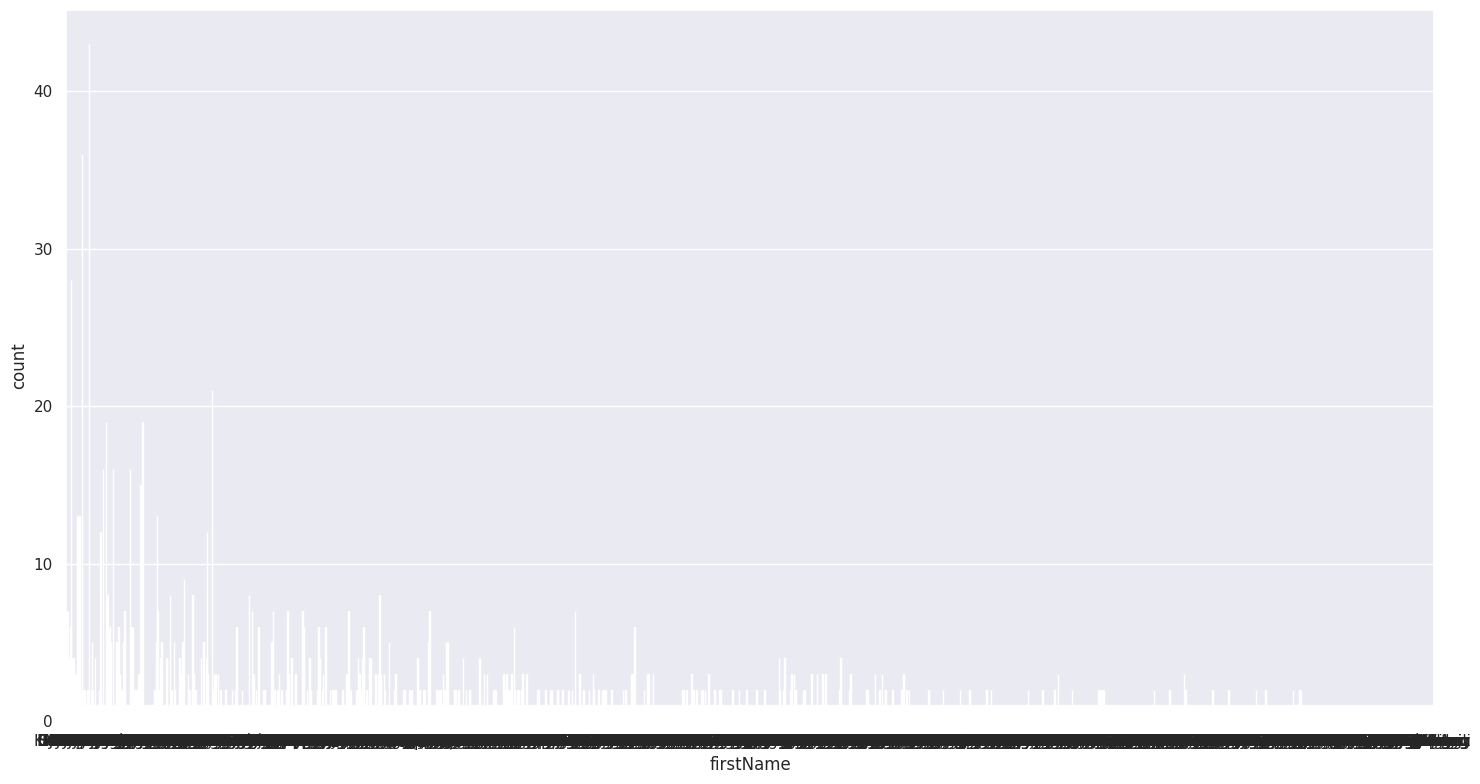

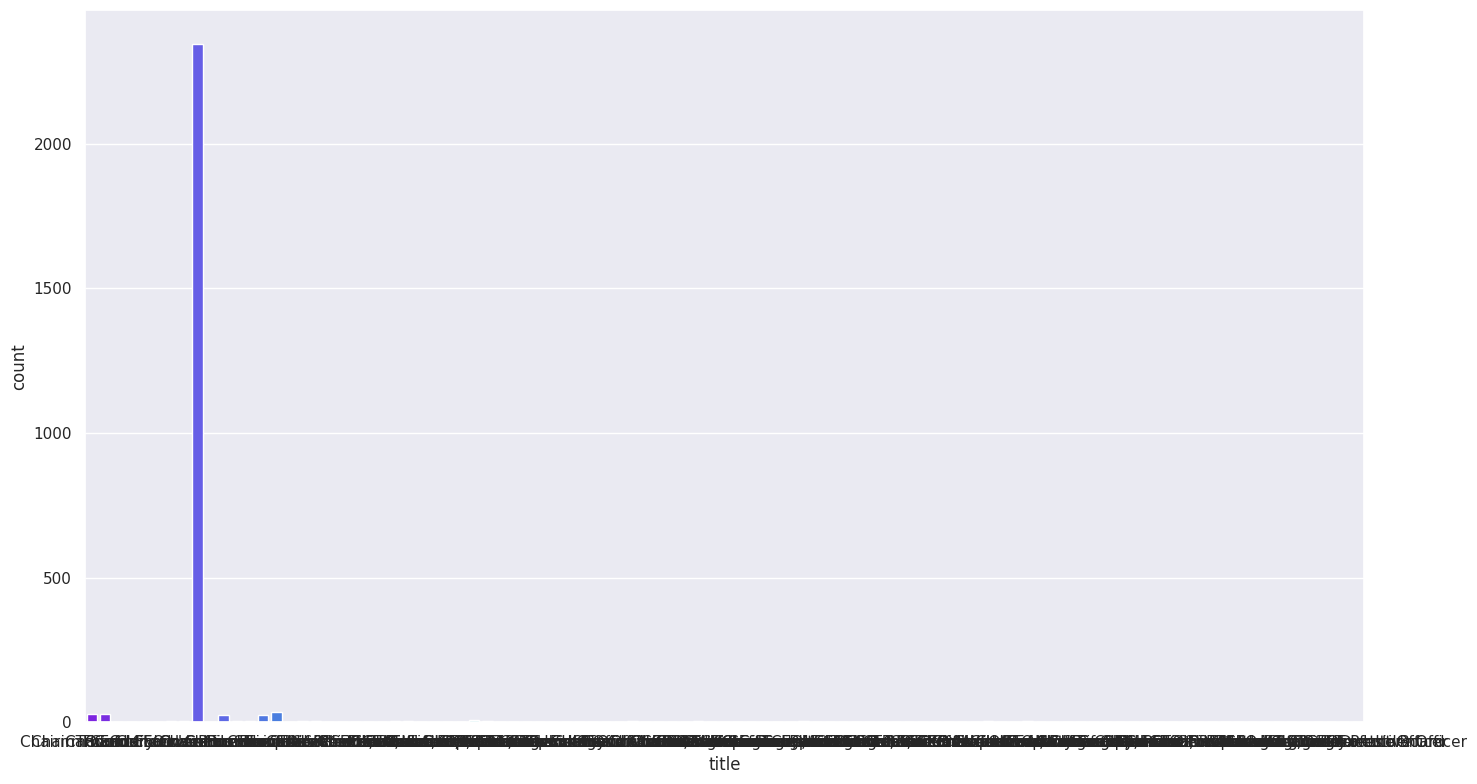

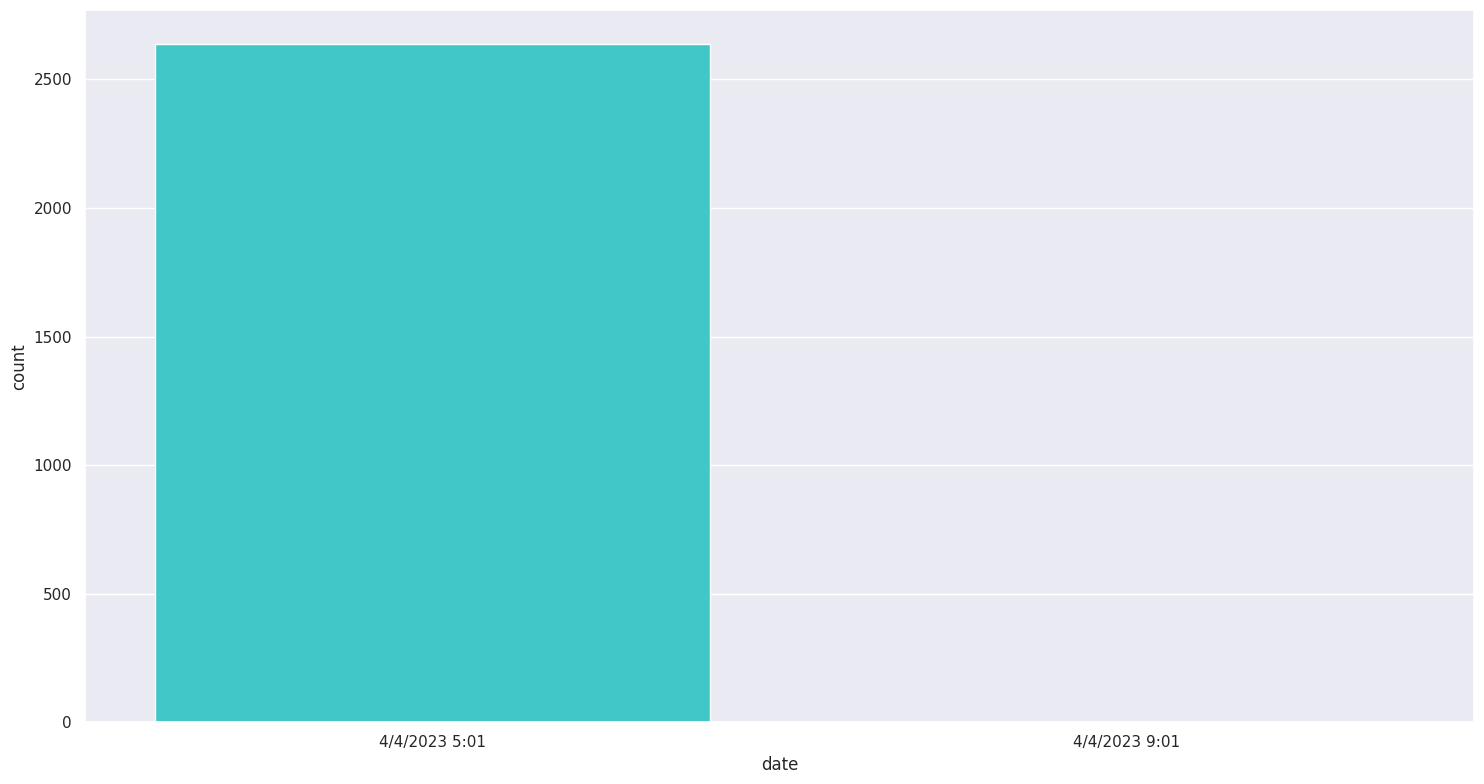

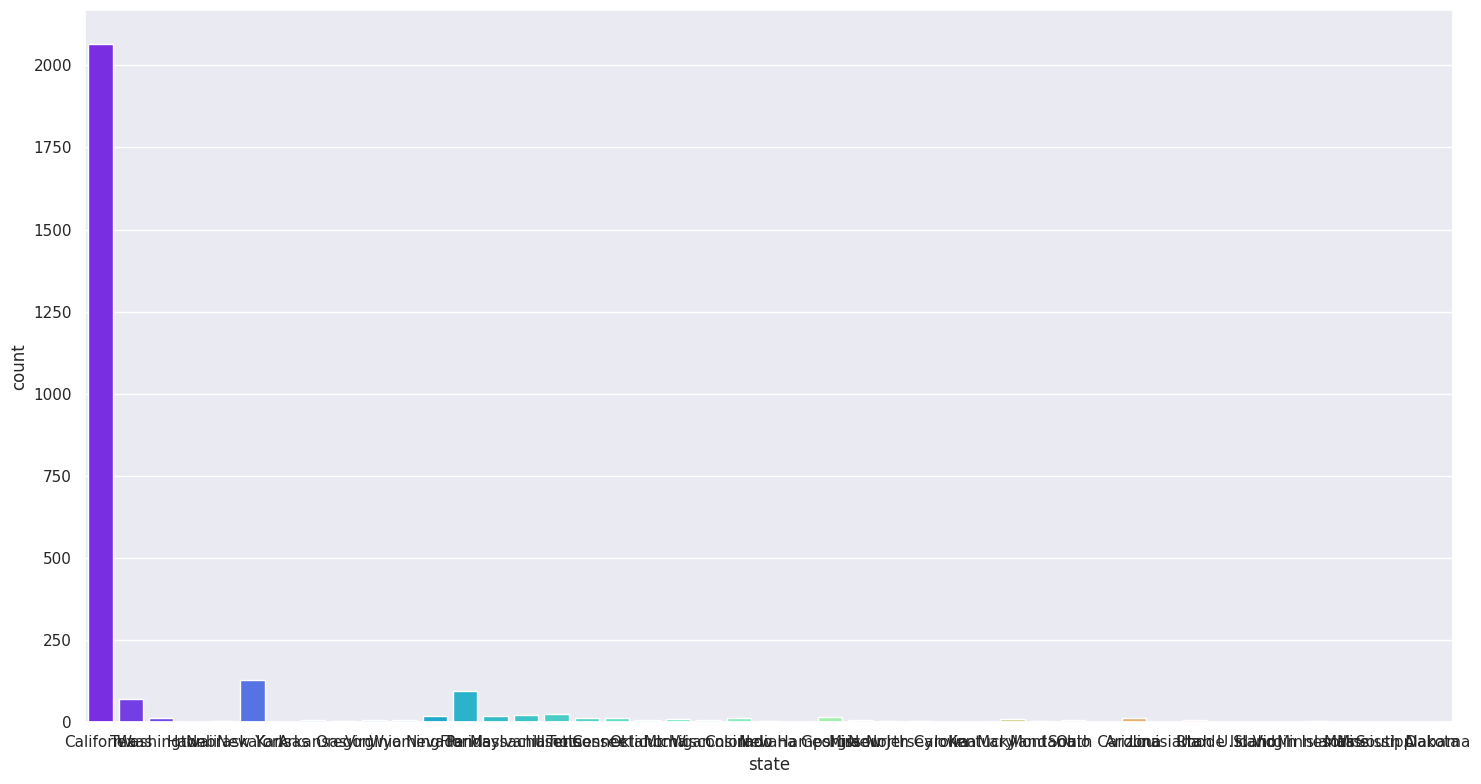

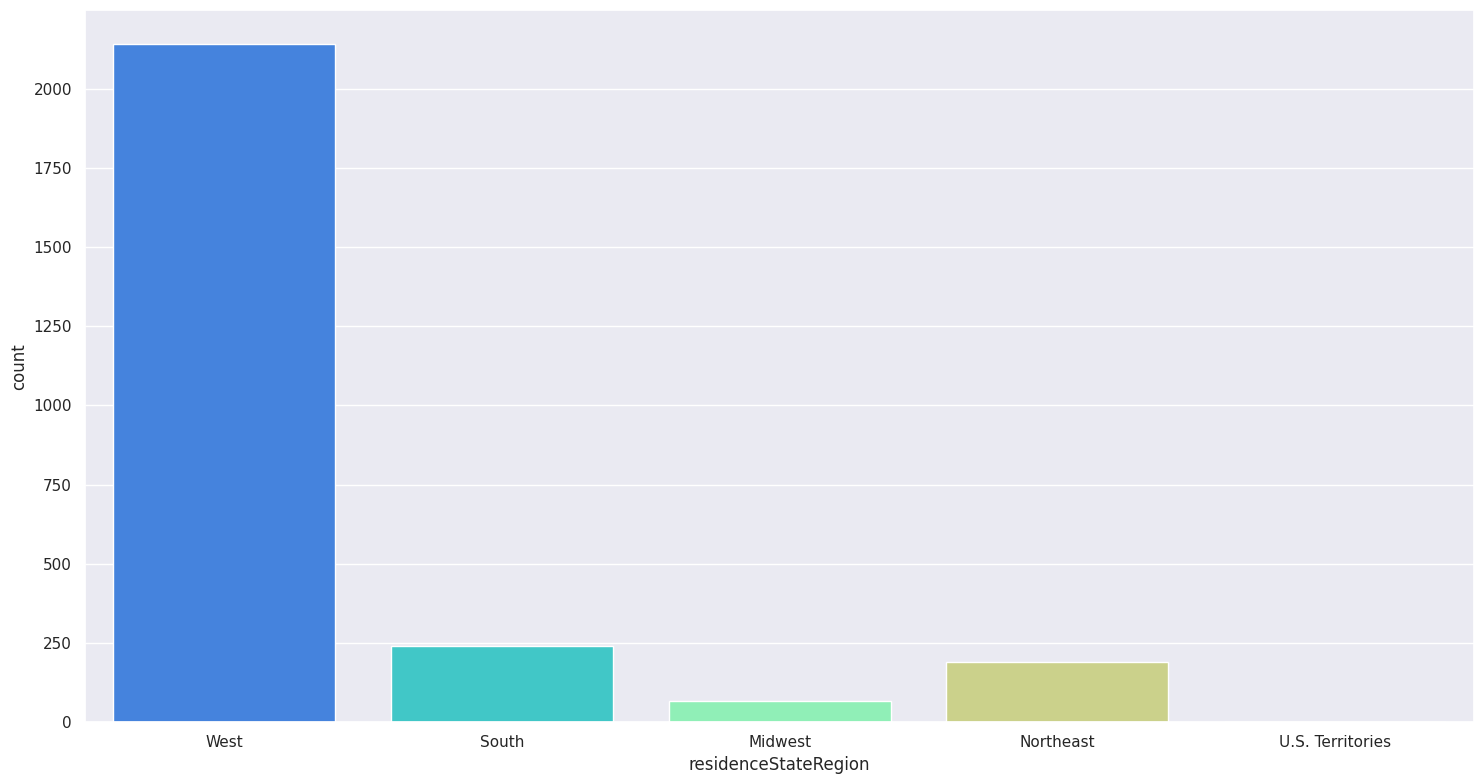

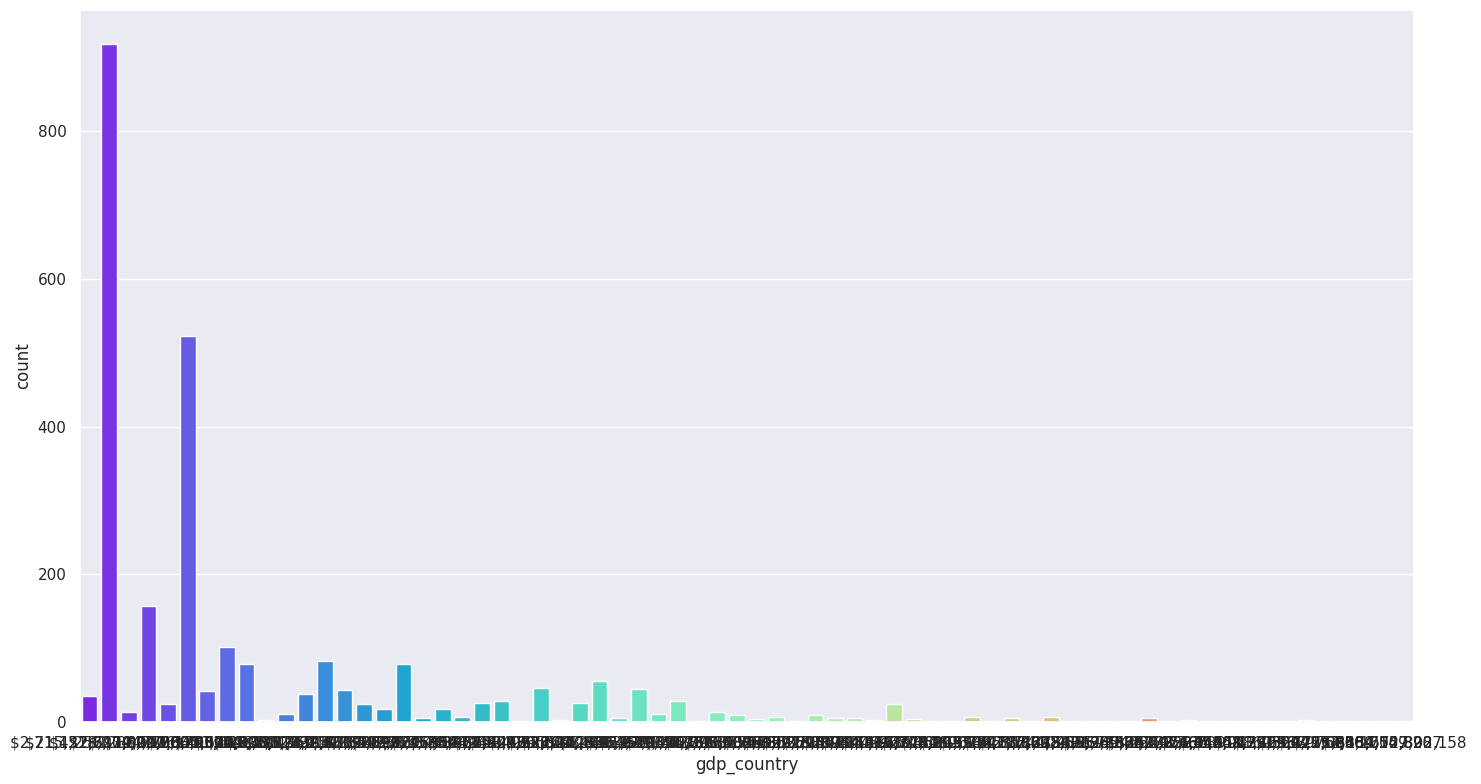

In [ ]:
# Explore categorical features
for column in df.select_dtypes(include=['object']):
    sns.countplot(x=column, data=df,palette='rainbow')
    plt.tight_layout()
    plt.show()

In [ ]:
# Explore categorical features
for column in df.select_dtypes(include=['object']):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, data=df,palette='rainbow')

    # Add count and percentage annotations to each bar
    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        count = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{count}\n{percentage}', (x, y), ha='center', va='bottom')

    plt.title(f'Count Plot for {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Billionaires' Rank vs. Final Worth by Gender
import plotly.express as px

# Assuming 'df' is your DataFrame
fig1 = px.scatter(df, x="rank", y="finalWorth", color="gender", title="Billionaires' Rank vs. Final Worth by Gender")
fig1.update_xaxes(type='log', title="Rank (log scale)")
fig1.update_yaxes(type='log', title="Final Worth (log scale)")

# Update layout to set the background color to white
fig1.update_layout(
    plot_bgcolor='white',  # Plot background color
    paper_bgcolor='white'  # Outside of the plot background color
)

fig1.show()

Outlier Treatment

Number of outliers removed: 1272


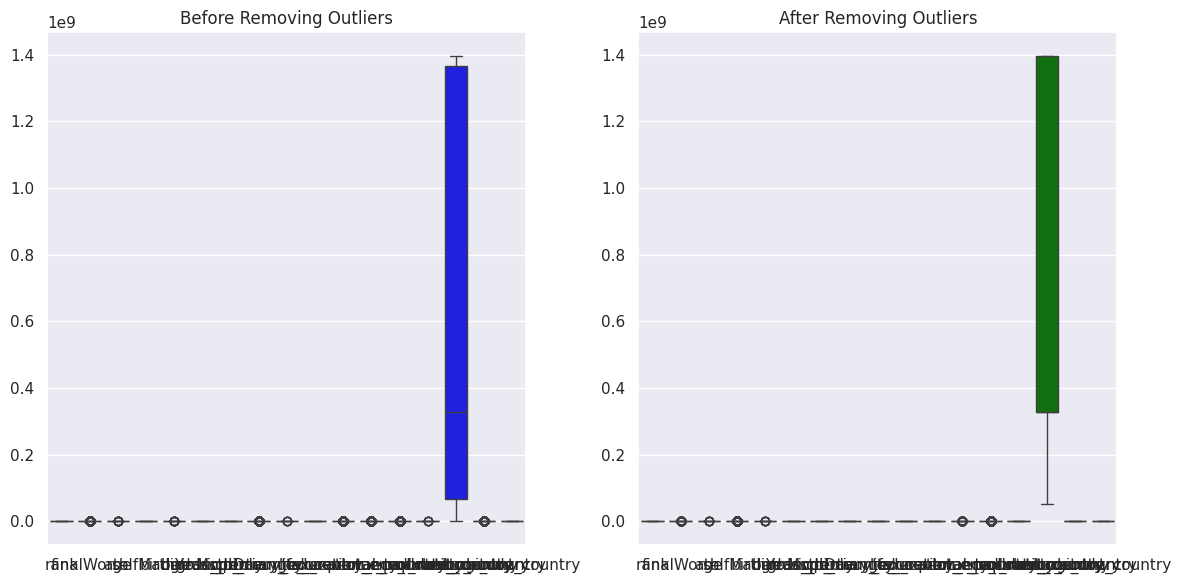

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
# df = ...

# Function to remove outliers using the IQR method
def remove_outliers_iqr(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['int64', 'float64'])

    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)

    # Interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)

    # Count the number of outliers removed
    num_outliers_removed = outliers.sum()

    # Filter DataFrame based on rows without outliers
    df_no_outliers = df[~outliers]

    return df_no_outliers, num_outliers_removed

# Remove outliers using IQR method and get the number of outliers removed
df_no_outliers, num_outliers_removed = remove_outliers_iqr(df)

print("Number of outliers removed:", num_outliers_removed)

# Function to plot boxplots before and after removing outliers
def plot_boxplots_before_after(df_before, df_after):
    # Set up the figure
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Boxplot before removing outliers (blue color)
    sns.boxplot(data=df_before, ax=axes[0], color='blue')
    axes[0].set_title('Before Removing Outliers')

    # Boxplot after removing outliers (green color)
    sns.boxplot(data=df_after, ax=axes[1], color='green')
    axes[1].set_title('After Removing Outliers')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Plot boxplots before and after outlier removal
plot_boxplots_before_after(df, df_no_outliers)